# WQD7003 Data Analytics Assignment
<br>Team Members:
<br>WQD170041 - Muhammad Izzuddin bin Ahamad Sfhafi 
<br>WQD170042 - Hafifi Yahya 
<br>WQD170033 - Jeremy Chin Ee Wei 
<br>WQD170044 - Lam Jia Lin 
<br>WQD170031 - Nur Aishah Alia Mohd Sallehhuddin

# Question: 
How can analytics give a more in depth understanding of retail business operations?
<br>
Can we use analytics to improve business processes and maximise revenue?

### Business Goal(s):
Create product pricing strategy based to increase revenue
<br>
Increase sales during holiday periods
<br>
Increase customer retention

### Data Mining Goal(s):
Identify high value customers more specifically through relationship trends
<br>
Identify High Selling Product
<br>
Find meaningful sales pattern based on time series
<br>
Building a model to predict customer churn and return
<br>


# Get the Data
### Dataset Chosen:
UK retailer dataset from https://www.kaggle.com/carrie1/ecommerce-data

Based on dataset information in kaggle, the dataset contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered full-online retailer. It was also mentioned that the company’s main product range or specialization are unique, all-occasion gifts with most of its customer base being wholesalers. 

### Motivation:
Data mining problems in retail: https://highlyscalable.wordpress.com/2015/03/10/data-mining-problems-in-retail/

### Related Works:
Kaggle: https://www.kaggle.com/
<br>
KD Nuggets: https://www.kdnuggets.com/

# CONTENTS

## DATA DISCOVERY
### - Understanding data types
### - Duplicates
### - Negative values
### - Unique values
### - Null and NaN values
### - Visualize extreme values
### - Investigate fields
### - Problematic descriptions

## DATA CLEANING
### - Separate missing descriptions
### - Remove problematic descriptions
### - Remove cancelled transactions
### - Assigning values to missing ID
### - Checking relationships between related business info and data
### - Data checks and verification
### - Features Engineering
### - Clean Data

## DATA VISUALIZATION
### - Revenue trends [Country,Months,Seasons,Weeks,Days]
### - Order quantity [Top Items]
### - Customer frequency
### - Exploratory Analysis

## DATA MODELLING
### - Derivation
### - Model
### - Evaluate model
### - Results



## Data Discovery

In [71]:
#import libraries and load dataset

import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns #seaborn is already installed
import matplotlib.pyplot as plt

#add list of other libraries used here

In [72]:
#loading the dataset
df = pd.read_csv('data.csv',encoding="ISO-8859-1",dtype={'CustomerID': str,})
print(df.shape)
df.head(3)

(541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom


In [3]:
# Check any duplicated data set and column formats
print(sum(df.duplicated(keep="first")),"transaction rows affected")
df.dtypes

5268 transaction rows affected


InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID      object
Country         object
dtype: object

In [4]:
#remove duplicate rows from dataset, reformatting columns and defining new fields for data exploration
df=df.drop_duplicates()
df.InvoiceDate = pd.to_datetime(df.InvoiceDate, format="%m/%d/%Y %H:%M")
df.StockCode=df.StockCode.str.upper() #to see if can separate some more
df.rename(columns={"InvoiceDate":'InvoiceDateTime'}, inplace=True)
df['InvoiceDate'] = pd.to_datetime([dt.datetime.date(d) for d in df['InvoiceDateTime']]) #to extract date only from datetime info
#df['InvoiceTime'] = df['InvoiceDateTime'].dt.time #to extract time only from datetime info
df['mth_end_dt'] = df['InvoiceDate']+pd.offsets.MonthEnd(0) #to get month end date position
df.shape

(536641, 10)

In [5]:
#summary of the numeric and object columns
print(df.describe(percentiles=[.01,.05,.25,.5,.75,.95,.99]))
df.describe(include=[np.object])

            Quantity      UnitPrice
count  536641.000000  536641.000000
mean        9.620029       4.632656
std       219.130156      97.233118
min    -80995.000000  -11062.060000
1%         -2.000000       0.190000
5%          1.000000       0.420000
25%         1.000000       1.250000
50%         3.000000       2.080000
75%        10.000000       4.130000
95%        30.000000       9.950000
99%       100.000000      18.000000
max     80995.000000   38970.000000


,InvoiceNo,StockCode,Description,CustomerID,Country
count,536641,536641,535187,401604,536641
unique,25900,3958,4223,4372,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,17841,United Kingdom
freq,1114,2368,2357,7812,490300


Discoveries:
<br>1.Existence of outliers in Quantity. 99% of data have quantity up until 100 but max and min quantities are 5 figure digits.
<br>2.Existence of outliers in UnitPrice. Interquartile range of UnitPrices is between 0.42 sterling until 4.13 sterling however min and max UnitPrice are 5 figure digits.
<br>3.Existence of negative quantities and unitprices.
<br>4.Number of unique values and in each object columns.

In [6]:
#We count the negative value of of quantity and Unit Price
print("The number of rows with negative Quantity:",sum(n < 0 for n in df.Quantity))
print("The number of rows with negative UnitPrice:",sum(n < 0 for n in df.UnitPrice))

The number of rows with negative Quantity: 10587
The number of rows with negative UnitPrice: 2


In [7]:
#Count Unique value in all dataset columns
df.nunique()

InvoiceNo          25900
StockCode           3958
Description         4223
Quantity             722
InvoiceDateTime    23260
UnitPrice           1630
CustomerID          4372
Country               38
InvoiceDate          305
mth_end_dt            13
dtype: int64

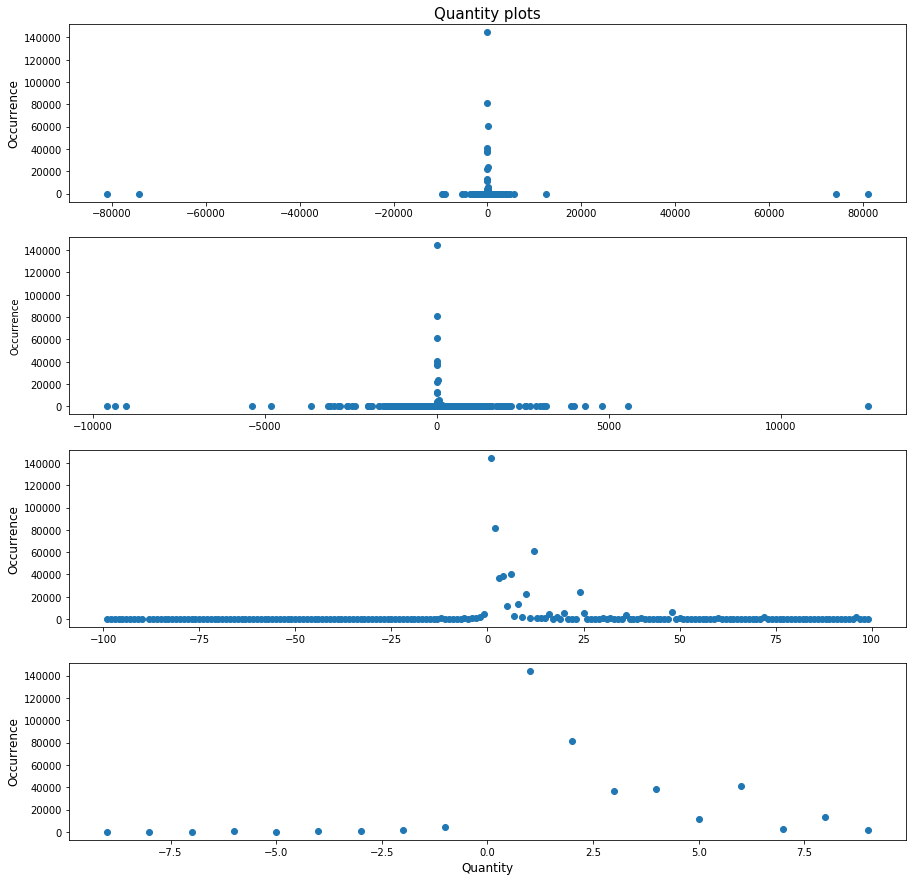

In [8]:
#visualising Quantity
#will someone consider modifying this into boxplot?

plt.figure(figsize=(15,15))

x=df.Quantity.value_counts().reset_index().as_matrix().transpose()
plt.subplot(411) #1st digit #rows, 2nd digit #columns, 3rd digit plot number
plt.scatter(x[0], x[1], marker='o')
plt.title('Quantity plots',fontsize=15)
plt.ylabel('Occurrence',fontsize=12)

x=df[df['Quantity'].abs()<20000].Quantity.value_counts().reset_index().as_matrix().transpose()
plt.subplot(412)
plt.scatter(x[0], x[1], marker='o')
plt.ylabel('Occurrence')

#Based on 99th percentile
x=df[df['Quantity'].abs()<100].Quantity.value_counts().reset_index().as_matrix().transpose()
plt.subplot(413)
plt.scatter(x[0], x[1], marker='o')
plt.ylabel('Occurrence',fontsize=12)

#Based on 3rd quartile
x=df[df['Quantity'].abs()<10].Quantity.value_counts().reset_index().as_matrix().transpose()
plt.subplot(414)
plt.scatter(x[0], x[1], marker='o')
plt.xlabel('Quantity',fontsize=12)
plt.ylabel('Occurrence',fontsize=12)

plt.show()

Discovery:
<br>1.Most abs(Quantity)<20000 range. Each positive range also seem to have a negative equivalent counterpart.

In [9]:
#Identifying what is the equivalent counterpart while taking a look at the outliers.
df[df['Quantity'].abs()>60000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDateTime,UnitPrice,CustomerID,Country,InvoiceDate,mth_end_dt
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom,2011-01-18,2011-01-31
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346,United Kingdom,2011-01-18,2011-01-31
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom,2011-12-09,2011-12-31
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446,United Kingdom,2011-12-09,2011-12-31


Discovery: 
<br>1.Quantity outliers due to customer making mistake in their order, and it has been cancelled. Can be removed from the dataset.
<br>2.The mistake order is offset by another transaction, given a different invoicedate and invoiceno. The only common field shared is the stockcode, customerID and quantity ordered.
<br>3. Invoices cancelled will have the letter C in front of the 6 digit invoiceno. 

In [10]:
#Identifying what is the equivalent counterpart while taking a look at the outliers.
df[(df['Quantity'].abs()>5000) & (df['Quantity'].abs()<20000)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDateTime,UnitPrice,CustomerID,Country,InvoiceDate,mth_end_dt
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838,United Kingdom,2010-12-02,2010-12-31
74614,542504,37413,NaN,5568,2011-01-28 12:03:00,0.00,NaN,United Kingdom,2011-01-28,2011-01-31
115818,546152,72140F,throw away,-5368,2011-03-09 17:25:00,0.00,NaN,United Kingdom,2011-03-09,2011-03-31
225528,556687,23003,Printing smudges/thrown away,-9058,2011-06-14 10:36:00,0.00,NaN,United Kingdom,2011-06-14,2011-06-30
225529,556690,23005,printing smudges/thrown away,-9600,2011-06-14 10:37:00,0.00,NaN,United Kingdom,2011-06-14,2011-06-30
225530,556691,23005,printing smudges/thrown away,-9600,2011-06-14 10:37:00,0.00,NaN,United Kingdom,2011-06-14,2011-06-30
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256,United Kingdom,2011-11-25,2011-11-30


Discovery:
<br>1.Length of stockcode is not restricted to 5 only.
<br>2.Existence of non-existing and weird descriptions in Description field.
<br>3.Existence of non-existing CustomerID.

In [11]:
#Check how NaN values affect the dataset
print('Number of rows in each column affected by existence of non-existing values:')
df.isnull().sum()

Number of rows in each column affected by existence of non-existing values:


InvoiceNo               0
StockCode               0
Description          1454
Quantity                0
InvoiceDateTime         0
UnitPrice               0
CustomerID         135037
Country                 0
InvoiceDate             0
mth_end_dt              0
dtype: int64

It seem like we have Nan of:
<br> 1454 in Description
<br> 135037 in Customer ID

In [12]:
#Now lets check what is in our negative quantity
df[df["Quantity"]<=0].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDateTime,UnitPrice,CustomerID,Country,InvoiceDate,mth_end_dt
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom,2010-12-01,2010-12-31
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom,2010-12-01,2010-12-31
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom,2010-12-01,2010-12-31
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,2010-12-01,2010-12-31
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,2010-12-01,2010-12-31
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,2010-12-01,2010-12-31
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,3.45,17548,United Kingdom,2010-12-01,2010-12-31
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom,2010-12-01,2010-12-31
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,2010-12-01 10:24:00,1.65,17548,United Kingdom,2010-12-01,2010-12-31
939,C536506,22960,JAM MAKING SET WITH JARS,-6,2010-12-01 12:38:00,4.25,17897,United Kingdom,2010-12-01,2010-12-31


Discovery: 
<br>Most of our negative quantity consist of InvoiceNo that start with "C". We found out "C" InvoiceNo show that the transactions have been cancelled. So we are going to assign all the Invoice "C" into new variable df.Cancel

In [13]:
#Access all the NaN element in the Description discovered earlier when checking number of rows affected with missing values
#from IPython.display import display, HTML
#dfNADescription=df[df.Description.isnull()]
print('Descriptive statistics of numeric columns:\n',df[df.Description.isnull()].describe())
print('\nDescriptive statistics of CustomerID columns:\n',df[df.Description.isnull()].CustomerID.describe())

Descriptive statistics of numeric columns:
           Quantity  UnitPrice
count  1454.000000     1454.0
mean     -9.359697        0.0
std     243.238758        0.0
min   -3667.000000        0.0
25%     -24.000000        0.0
50%      -3.000000        0.0
75%       4.000000        0.0
max    5568.000000        0.0

Descriptive statistics of CustomerID columns:
 count     0
unique    0
Name: CustomerID, dtype: int64


After accessing the the NaN Description (1454 row), we found that they were zero unit price with NaN customer Id. As our focus in toward finding item that contribute to the revenue. we decide to drop them in cleaning section 

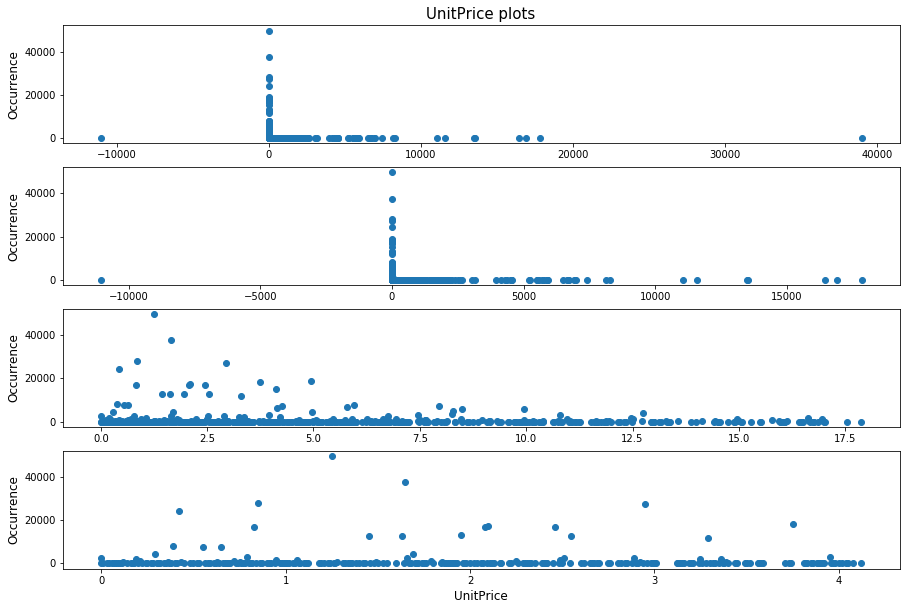

In [14]:
#plot price to see outliers
#since describe reveal that min and max quantities are in the range >10000 as compared to most sections of the dataset

plt.figure(figsize=(15,10))

x=df.UnitPrice.value_counts().reset_index().as_matrix().transpose()
plt.subplot(411)
plt.scatter(x[0], x[1], marker='o')
plt.title('UnitPrice plots',fontsize=15)
plt.ylabel('Occurrence',fontsize=12)

x=df[df['UnitPrice'].abs()<20000].UnitPrice.value_counts().reset_index().as_matrix().transpose()
plt.subplot(412)
plt.scatter(x[0], x[1], marker='o')
plt.ylabel('Occurrence',fontsize=12)

#99th-percentile
x=df[df['UnitPrice'].abs()<18].UnitPrice.value_counts().reset_index().as_matrix().transpose()
plt.subplot(413)
plt.scatter(x[0], x[1], marker='o')
plt.ylabel('Occurrence',fontsize=12)

#3rd quartile
x=df[df['UnitPrice'].abs()<4.13].UnitPrice.value_counts().reset_index().as_matrix().transpose()
plt.subplot(414)
plt.scatter(x[0], x[1], marker='o')
plt.ylabel('Occurrence',fontsize=12)
plt.xlabel('UnitPrice',fontsize=12)

plt.show()

In [15]:
#Identifying what is the equivalent counterpart while taking a look at the outliers.
df[df['UnitPrice'].abs()>10000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDateTime,UnitPrice,CustomerID,Country,InvoiceDate,mth_end_dt
15016,C537630,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:04:00,13541.33,NaN,United Kingdom,2010-12-07,2010-12-31
15017,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.33,NaN,United Kingdom,2010-12-07,2010-12-31
16232,C537644,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:34:00,13474.79,NaN,United Kingdom,2010-12-07,2010-12-31
16356,C537651,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:49:00,13541.33,NaN,United Kingdom,2010-12-07,2010-12-31
43702,C540117,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:55:00,16888.02,NaN,United Kingdom,2011-01-05,2011-01-31
43703,C540118,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:57:00,16453.71,NaN,United Kingdom,2011-01-05,2011-01-31
222681,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.00,15098,United Kingdom,2011-06-10,2011-06-30
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom,2011-08-12,2011-08-31
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom,2011-08-12,2011-08-31
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom,2011-08-12,2011-08-31


Discovery:
<br>1. Large UnitPrices are driven by other categories of stockcodes - stockcodes unrelated to items.

In [16]:
#The stockcodes aren't linked to any other item purchases - single item per invoice.
df[df['InvoiceNo']=='537632']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDateTime,UnitPrice,CustomerID,Country,InvoiceDate,mth_end_dt
15017,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.33,NaN,United Kingdom,2010-12-07,2010-12-31


In [17]:
#Investigating stockcode and invoiceno fields based on discoveries made

#defining the variables
df['length_stockcode']=df.StockCode.str.len()
df['length_invoiceno']=df.InvoiceNo.str.len()
df['invoiceno_letter1']=df['InvoiceNo'].str[0]

print("length of InvoiceNo:\n",df.length_invoiceno.value_counts(sort=True)\
      .reset_index(name='no_rows').rename(columns={'index':'length of InvoiceNo'}))
print("\nFirst letter for invoice:\n",df.invoiceno_letter1.value_counts(sort=True)\
      .reset_index(name='no_rows').rename(columns={'index':'invoice first letter'}))
print("\nCross table first letter for invoice against invoiceno length:\n"\
      ,pd.crosstab(df['invoiceno_letter1'],df['length_invoiceno'],margins=True))
print("\nlength of StockCode:\n",df.length_stockcode.value_counts(sort=True)\
      .reset_index(name='no_rows').rename(columns={'index':'length of StockCode'})) 

length of InvoiceNo:
    length of InvoiceNo  no_rows
0                    6   527387
1                    7     9254

First letter for invoice:
   invoice first letter  no_rows
0                    5   527387
1                    C     9251
2                    A        3

Cross table first letter for invoice against invoiceno length:
 length_invoiceno        6     7     All
invoiceno_letter1                      
5                  527387     0  527387
A                       0     3       3
C                       0  9251    9251
All                527387  9254  536641

length of StockCode:
    length of StockCode  no_rows
0                    5   482154
1                    6    51108
2                    4     1276
3                    3      710
4                    1      709
5                    7      390
6                    2      144
7                   12       71
8                    9       48
9                    8       31


Discoveries: 
<br>1.Invoice length is either 6 or 7; those with length 7 will start with letter A or C 
<br>2.Since most rows have StockCode of length 5 or 6, this is considered the legitimate StockCode referring to item description.
<br>4.StockCode length is between 1 to 12 (excl. 10 and 11).

In [18]:
#display what are the unique stockcodes for invoiceno with length below 5 or above 8
print("\nDescription for StockCode with length below 5 or above 8 and number of lines affected:")
      #\n"\
#      ,df[(df['length_stockcode']<5) | (df['length_stockcode']>8)]\
#      [['length_stockcode','invoiceno_letter1','StockCode','Description']]\
#      .groupby(by=['invoiceno_letter1','length_stockcode','StockCode']).Description.value_counts().reset_index(name='Freq'))

df[(df['length_stockcode']<5) | (df['length_stockcode']>8)]\
[['length_stockcode','invoiceno_letter1','StockCode','Description']]\
.groupby(by=['length_stockcode','StockCode','invoiceno_letter1']).Description.value_counts().reset_index(name='Freq').head(6)


Description for StockCode with length below 5 or above 8 and number of lines affected:


,length_stockcode,StockCode,invoiceno_letter1,Description,Freq
0,1,B,A,Adjust bad debt,3
1,1,D,C,Discount,77
2,1,M,5,Manual,323
3,1,M,C,Manual,244
4,1,S,5,SAMPLES,2
5,1,S,C,SAMPLES,60


Descoveries: 
<br>1.Retailer is dotcomgiftshop. Gift voucher is part of their product offering. Website: https://www.dotcomgiftshop.com
<br>2.StockCode with length<=4 have nothing to do with items at all.
<br>3.In StockCodes with length 9 or 12, some descriptions does not refer to product item descriptions (AMAZONFEE and BANK CHARGES).

In [19]:
#analysing stockcode and invoiceno field

#display what are the unique stockcodes for invoiceno of length 7 or 8
print("\nDescription for StockCode with length 7 or 8 and number of lines affected:\n")
df[(df['length_stockcode']==7) | (df['length_stockcode']==8)]\
[['length_stockcode','invoiceno_letter1','StockCode','Description']]\
.groupby(by=['length_stockcode','StockCode']).Description.value_counts().reset_index(name='freq').head(6)


Description for StockCode with length 7 or 8 and number of lines affected:



,length_stockcode,StockCode,Description,freq
0,7,15056BL,EDWARDIAN PARASOL BLACK,388
1,7,79323GR,"Unsaleable, destroyed.",1
2,7,79323LP,"Unsaleable, destroyed.",1
3,8,DCGS0003,BOXED GLASS ASHTRAY,4
4,8,DCGS0003,ebay,1
5,8,DCGS0004,HAYNES CAMPER SHOULDER BAG,1


Discovery:
<br>Stockcodes with length 7 or 8 consist of mixture of item description and remarks about the item/transaction.

In [20]:
#From initial assessment, we found out most problematic description contain lower case letter and '?' symbol
df[df['Description'].str.contains("^[a-z]|\\?",case=True, na=False)].\
drop(['mth_end_dt','length_stockcode','length_invoiceno','invoiceno_letter1'],axis=1).head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDateTime,UnitPrice,CustomerID,Country,InvoiceDate
6391,536941,22734,amazon,20,2010-12-03 12:08:00,0.0,NaN,United Kingdom,2010-12-03
6392,536942,22139,amazon,15,2010-12-03 12:08:00,0.0,NaN,United Kingdom,2010-12-03
7313,537032,21275,?,-30,2010-12-03 16:50:00,0.0,NaN,United Kingdom,2010-12-03
13217,537425,84968F,check,-20,2010-12-06 15:35:00,0.0,NaN,United Kingdom,2010-12-06
13218,537426,84968E,check,-35,2010-12-06 15:36:00,0.0,NaN,United Kingdom,2010-12-06
13264,537432,35833G,damages,-43,2010-12-06 16:10:00,0.0,NaN,United Kingdom,2010-12-06
15651,537639,22734,amazon,30,2010-12-07 15:29:00,0.0,NaN,United Kingdom,2010-12-07
21338,538072,22423,faulty,-13,2010-12-09 14:10:00,0.0,NaN,United Kingdom,2010-12-09
21518,538090,20956,?,-723,2010-12-09 14:48:00,0.0,NaN,United Kingdom,2010-12-09
24290,538348,22734,amazon,30,2010-12-10 14:59:00,0.0,NaN,United Kingdom,2010-12-10


In [21]:
print('Descriptive statistics for Numeric columns:\n',df[df['Description'].str.contains("^[a-z]|\\?",case=True, na=False)]\
      .describe())
print('\nDescriptive statistics for object columns:\n',df[df['Description'].str.contains("^[a-z]|\\?",case=True, na=False)]\
      .drop(['Country'],axis=1).describe(include=[np.object]))

Descriptive statistics for Numeric columns:
           Quantity  UnitPrice  length_stockcode  length_invoiceno
count   552.000000      552.0        552.000000             552.0
mean   -172.856884        0.0          5.298913               6.0
std     777.996692        0.0          0.583623               0.0
min   -9600.000000        0.0          5.000000               6.0
25%    -132.000000        0.0          5.000000               6.0
50%     -37.000000        0.0          5.000000               6.0
75%      -1.000000        0.0          6.000000               6.0
max    4000.000000        0.0         12.000000               6.0

Descriptive statistics for object columns:
        InvoiceNo StockCode Description  CustomerID invoiceno_letter1
count        552       552         552         0.0               552
unique       552       427         133         0.0                 1
top       572702     23084       check         NaN                 5
freq           1         5         159  

Seems like all the error description have:
<br>1.null CustomerID 
<br>2.UnitPrice=0 
<br>Test if using these criteria will only eliminate weird descriptions:

In [22]:
print('no of rows affected:',df[(df.CustomerID.isnull()) & (df['UnitPrice']==0)].shape[0])
df[(df.CustomerID.isnull()) & (df['UnitPrice']==0)]\
.Description.value_counts().reset_index(name='freq').rename(columns={'index':'Description'}).head(10)

no of rows affected: 2470


,Description,freq
0,check,159
1,?,47
2,damages,45
3,damaged,43
4,found,25
5,sold as set on dotcom,20
6,adjustment,16
7,Damaged,14
8,thrown away,9
9,FRENCH BLUE METAL DOOR SIGN 1,9


Seems like it also removes some valid product descriptions, but these products have UnitPrices = 0 which is not expected. The file containing these transactions can be passed to data owner for investigation purposes.

#### Now we count each of the word under problematic description
from IPython.display import display, HTML
df.prob1=df.prob.Description.str.split(expand=True).stack().value_counts().to_frame().reset_index()
HTML(df.prob1.to_html())

<h2>Data Cleaning</h2>
<br>Based on discoveries:
<br>1. Remove the 1454 missing description rows from the dataset into a new file
<br>2. StockCodes with length lesser than 5, StockCode 'AMAZONFEE" and 'BANK CHARGES" will be separated into a new file
<br>3. Remove rows that contain problematic description and UnitPrice=0 into a new file.
<br>4. Separate cancelled transactions from non-cancelled transactions.
<br>5. Assume rows of missing CustomerID is not registered customer and will be assigned random CustomerID by concatenating "R" and InvoiceNo - R to represent 'Randomly generated'.

In [23]:
#perform modification on df1
df1=df.copy()
df1.shape

(536641, 13)

In [24]:
#1. Separate missing description rows
df.NAdesc=df1[(df1.Description.isnull())]
print(df.NAdesc.shape)
df.NAdesc.to_csv('No descriptions.csv',index=False)
df1=df1[~(df1.Description.isnull())]
print(df1.shape)

(1454, 13)
(535187, 13)


In [25]:
#2. Separate length-stockcode<5, StockCode=['AMAZONFEE','BANK CHARGES']
df.otherdesc=df1[(df1['length_stockcode']<5) | (df1['StockCode']=='AMAZONFEE') \
                       | (df1['StockCode']=='BANK CHARGES')]
print(df.otherdesc.shape)
df.otherdesc.to_csv('Other descriptions.csv',index=False)
df1=df1[~((df1['length_stockcode']<5) | (df1['StockCode']=='AMAZONFEE') \
                       | (df1['StockCode']=='BANK CHARGES'))]
print(df1.shape)

(2904, 13)
(532283, 13)


In [26]:
#3. Remove rows that contain problematic description and UnitPrice=0 into a new file.
df.weird=df1[(df1.CustomerID.isnull()) & (df1['UnitPrice']==0)]
print(df.weird.shape)
df.weird.to_csv('weird description and or unitprice.csv',index=False)
df1=df1[~((df1.CustomerID.isnull()) & (df1['UnitPrice']==0))]
print(df1.shape)

(1014, 13)
(531269, 13)


In [27]:
#4. to remove Cancelled transactions into a separate dataset
df.Cancel=df1[df1['invoiceno_letter1']=='C']
print(df.Cancel.shape)
df.Cancel.to_csv('Cancelled Transactions v2.csv',index=False)
df1=df1[df1['invoiceno_letter1']!='C']
print(df1.shape)
#we have 9251 row of cancelled transaction

(8668, 13)
(522601, 13)


In [28]:
#1. Assign value to our missing customerID based on the Invoice Number
df1["CustomerID"].fillna("R"+df1["InvoiceNo"], inplace=True)
df.CustomerID.value_counts(sort=True)
NewID = df1.groupby(['CustomerID','Description']).sum()
NewID.head(10)

Quantity  UnitPrice  \
CustomerID Description                                              
12346      MEDIUM CERAMIC TOP STORAGE JAR        74215       1.04   
12347      3D DOG PICTURE PLAYING CARDS            126      14.75   
           3D SHEET OF CAT STICKERS                 12       0.85   
           3D SHEET OF DOG STICKERS                 12       0.85   
           60 TEATIME FAIRY CAKE CASES              72       1.65   
           72 SWEETHEART FAIRY CAKE CASES           72       1.65   
           AIRLINE BAG VINTAGE JET SET BROWN        28      25.50   
           AIRLINE BAG VINTAGE JET SET RED          16      12.75   
           AIRLINE BAG VINTAGE JET SET WHITE        12      12.75   
           AIRLINE BAG VINTAGE TOKYO 78             32      16.70   

                                              length_stockcode  \
CustomerID Description                                           
12346      MEDIUM CERAMIC TOP STORAGE JAR                    5   
12347      3D DOG PICTURE PLAYING CARDS                     30   
           3D SHEET OF CAT STICKERS                          6   
           3D SHEET OF DOG STICKERS                          6   
           60 TEATIME FAIRY CAKE CASES                      15   
           72 SWEETHEART FAIRY CAKE CASES                   15   
           AIRLINE BAG VINTAGE JET SET BROWN                30   
           AIRLINE BAG VINTAGE JET SET RED                  15   
           AIRLINE BAG VINTAGE JET SET WHITE                15   
           AIRLINE BAG VINTAGE TOKYO 78                     20   

                                              length_invoiceno  
CustomerID Description                                          
12346      MEDIUM CERAMIC TOP STORAGE JAR                    6  
12347      3D DOG PICTURE PLAYING CARDS                     30  
           3D SHEET OF CAT STICKERS                          6  
           3D SHEET OF DOG STICKERS                          6  
           60 TEATIME FAIRY CAKE CASES                      18  
           72 SWEETHEART FAIRY CAKE CASES                   18  
           AIRLINE BAG VINTAGE JET SET BROWN                36  
           AIRLINE BAG VINTAGE JET SET RED                  18  
           AIRLINE BAG VINTAGE JET SET WHITE                18  
           AIRLINE BAG VINTAGE TOKYO 78                     24

In [29]:
#Check if there is any lowercase letter in stock code
df1[df1['StockCode'].str.contains("[a-z]",case=True, na=False)]
#No lowercase code

,InvoiceNo,StockCode,Description,Quantity,InvoiceDateTime,UnitPrice,CustomerID,Country,InvoiceDate,mth_end_dt,length_stockcode,length_invoiceno,invoiceno_letter1


In [30]:
#Now let check of negative Quantity
df1[df1["Quantity"]<=0]
#Our negative quantity is zero as most of our negative quantity are inside Nan Description that we removed earlier

,InvoiceNo,StockCode,Description,Quantity,InvoiceDateTime,UnitPrice,CustomerID,Country,InvoiceDate,mth_end_dt,length_stockcode,length_invoiceno,invoiceno_letter1


In [31]:
#we check if our problematic Description got removed by the drop negative and zero unit price
from IPython.display import display, HTML
df1.prob=df1[df1['Description'].str.contains("^[a-z]|\\?",case=True, na=False)]
df1.prob1=df1.prob.Description.str.split(expand=True).stack().value_counts().to_frame().reset_index()
HTML(df1.prob1.to_html())
#Our hypothesis is true as all the problematic description also got removed by our previous droping actvities

,index,0


In [32]:
#Now let check if the result of our cleaning process
df1.describe()
# We no longer have negative value for our numeric column

,Quantity,UnitPrice,length_stockcode,length_invoiceno
count,522601.000000,522601.000000,522601.00000,522601.0
mean,10.668357,3.274861,5.09752,6.0
std,157.542354,4.396005,0.30413,0.0
min,1.000000,0.000000,5.00000,6.0
25%,1.000000,1.250000,5.00000,6.0
50%,4.000000,2.080000,5.00000,6.0
75%,12.000000,4.130000,5.00000,6.0
max,80995.000000,649.500000,12.00000,6.0


In [33]:
df1.isnull().sum()
#All our Nan have been removed from the description

InvoiceNo            0
StockCode            0
Description          0
Quantity             0
InvoiceDateTime      0
UnitPrice            0
CustomerID           0
Country              0
InvoiceDate          0
mth_end_dt           0
length_stockcode     0
length_invoiceno     0
invoiceno_letter1    0
dtype: int64

In [34]:
#Check if our cnew customer ID that been assigned with "R" + InvoiceNo
df1[df1['CustomerID'].str.contains("R",case=False, na=False)].head(6)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDateTime,UnitPrice,CustomerID,Country,InvoiceDate,mth_end_dt,length_stockcode,length_invoiceno,invoiceno_letter1
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,R536544,United Kingdom,2010-12-01,2010-12-31,5,6,5
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,R536544,United Kingdom,2010-12-01,2010-12-31,5,6,5
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,R536544,United Kingdom,2010-12-01,2010-12-31,5,6,5
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,R536544,United Kingdom,2010-12-01,2010-12-31,5,6,5
1447,536544,21790,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,R536544,United Kingdom,2010-12-01,2010-12-31,5,6,5
1448,536544,21791,VINTAGE HEADS AND TAILS CARD GAME,2,2010-12-01 14:32:00,2.51,R536544,United Kingdom,2010-12-01,2010-12-31,5,6,5


In [35]:
# Check again for any Nan Value
df1.isnull().sum()

InvoiceNo            0
StockCode            0
Description          0
Quantity             0
InvoiceDateTime      0
UnitPrice            0
CustomerID           0
Country              0
InvoiceDate          0
mth_end_dt           0
length_stockcode     0
length_invoiceno     0
invoiceno_letter1    0
dtype: int64

In [36]:
df1.nunique()

InvoiceNo            19776
StockCode             3803
Description           4017
Quantity               375
InvoiceDateTime      18335
UnitPrice              501
CustomerID            5706
Country                 38
InvoiceDate            305
mth_end_dt              13
length_stockcode         6
length_invoiceno         1
invoiceno_letter1        1
dtype: int64

In [37]:
df1.StkDsc=df1.groupby("StockCode")['Description'].nunique().reset_index()
df1stk=df1.StkDsc[df1.StkDsc["Description"]>1]
df1stk.head(10)
#We have 215 row of stock code that have more than 1 description

,StockCode,Description
42,16156L,2
100,17107D,3
118,20622,2
170,20725,2
265,20914,2
363,21109,2
366,21112,2
407,21175,2
448,21232,2
453,21243,2


<h2>Relationship between Public Holiday and the Transactions</h2>
<br>The public holidays in UK are signified by HolidayType Bank holiday. <br>source:
http://webarchive.nationalarchives.gov.uk/20110202151639/http://www.direct.gov.uk/en/Governmentcitizensandrights/LivingintheUK/DG_073741

In [38]:
#appending UK holiday and commerce data to see any relationship 

#fetch 2010 UK holidays from website
temp = pd.read_html('https://www.timeanddate.com/holidays/uk/2010', header=0)
#convert data imported from website into Data Frame
holiday2010 = temp[0]
#Clean up date field to add the year and format the column into datetime format
holiday2010['Date'] = pd.to_datetime(holiday2010['Date']+", 2010",format="%b %d, %Y")
#filter to take only December 2010 UK holidays since dataset transaction period begins at 1 December 2010
holiday2010=holiday2010[holiday2010["Date"]>'2010-11-30']

#fetch 2011 UK holidays from website
temp = pd.read_html('https://www.timeanddate.com/holidays/uk/2011', header=0)
#convert data imported from website into Data Frame
holiday2011= temp[0]
#Clean up date field to add the year and format the column into datetime format
holiday2011['Date'] = pd.to_datetime(holiday2011['Date']+", 2011",format="%b %d, %Y")

#UKholiday=pd.read_csv('UK holidays Dec10 - Dec11.csv')

#Combine the two tables to generate one UK holiday table for use
UKholiday=pd.concat([holiday2010,holiday2011])
print(UKholiday.shape)
UKholiday.head(3)

(106, 5)


,Date,Weekday,Holiday Name,Holiday Type,Where It is Observed
81,2010-12-02,Thursday,First Day of Hanukkah,Jewish holiday,NaN
82,2010-12-08,Wednesday,Feast of the Immaculate Conception,Christian,NaN
83,2010-12-08,Wednesday,Muharram/Islamic New Year,Muslim,NaN


In [39]:
#cleaning up holiday file
UKholiday.rename(columns={'Holiday Name':'HolidayName','Holiday Type':'HolidayType','Where It is Observed':'Observed'},inplace=True)
UKholiday["Observed"][UKholiday["HolidayType"]=="Bank holiday"]="Nationwide"
UKholiday=UKholiday[~(UKholiday["HolidayType"]=="Clock change/Daylight Saving Time")]
UKholiday['Date']=pd.to_datetime(UKholiday.Date,format='%m/%d/%Y')
UKholiday.head(3)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,Weekday,HolidayName,HolidayType,Observed
81,2010-12-02,Thursday,First Day of Hanukkah,Jewish holiday,NaN
82,2010-12-08,Wednesday,Feast of the Immaculate Conception,Christian,NaN
83,2010-12-08,Wednesday,Muharram/Islamic New Year,Muslim,NaN


In [40]:
#Looking at the HolidayType related to UK's official public holiday
UKholiday.HolidayType.value_counts()

Jewish holiday           18
Observance               18
Christian                17
Bank holiday             15
Muslim                    8
Hindu Holiday             7
Orthodox                  6
Season                    5
Local Bank Holiday        4
Common Local Holidays     3
Jewish commemoration      1
Local observance          1
Observance, Christian     1
Name: HolidayType, dtype: int64

In [41]:
#UK's official public holiday has HolidayType 'Bank holiday'. 
#Merge with transaction dataset to see how many transactions occurs on UK official public holiday.
temp=UKholiday[UKholiday['HolidayType']=='Bank holiday']
print('List of UK Public Holidays during transaction period:\n\n',temp)
pd.merge(df1,temp,left_on='InvoiceDate',right_on='Date',indicator=True).shape[0]

List of UK Public Holidays during transaction period:

          Date   Weekday                 HolidayName   HolidayType    Observed
87 2010-12-25  Saturday               Christmas Day  Bank holiday  Nationwide
88 2010-12-27    Monday                  Boxing Day  Bank holiday  Nationwide
89 2010-12-27    Monday                Bank Holiday  Bank holiday  Nationwide
90 2010-12-28   Tuesday      Christmas Day observed  Bank holiday  Nationwide
91 2010-12-28   Tuesday                Bank Holiday  Bank holiday  Nationwide
0  2011-01-01  Saturday              New Year's Day  Bank holiday  Nationwide
1  2011-01-03    Monday     New Year's Day observed  Bank holiday  Nationwide
2  2011-01-03    Monday      New Year's Day Holiday  Bank holiday  Nationwide
26 2011-04-22    Friday                 Good Friday  Bank holiday  Nationwide
37 2011-04-29    Friday  Royal Wedding Bank Holiday  Bank holiday  Nationwide
39 2011-05-02    Monday      Early May Bank Holiday  Bank holiday  Nationwide
42 2011-

0

Discovery:
<br> There are no transactions that occur during the public holidays at all.

In [42]:
#When are the seasons?
UKholiday[UKholiday["HolidayType"]=="Season"]

,Date,Weekday,HolidayName,HolidayType,Observed
85,2010-12-21,Tuesday,December Solstice,Season,NaN
19,2011-03-20,Sunday,March equinox,Season,NaN
50,2011-06-21,Tuesday,June Solstice,Season,NaN
64,2011-09-23,Friday,September equinox,Season,NaN
87,2011-12-22,Thursday,December Solstice,Season,NaN


Based on the Seasons Dates above:

In [43]:
#Append Season data to ecommerce dataset
df1.loc[df1['InvoiceDate']<dt.date(2010,12,21),'Season']='Autumn'
df1.loc[((df1["InvoiceDate"]>=dt.date(2010,12,21)) & (df1["InvoiceDate"]<dt.date(2011,3,20))),'Season']="Winter" 
df1.loc[((df1["InvoiceDate"]>=dt.date(2011,3,20)) & (df1["InvoiceDate"]<dt.date(2011,6,21))),'Season']="Spring" 
df1.loc[((df1["InvoiceDate"]>=dt.date(2011,6,21)) & (df1["InvoiceDate"]<dt.date(2011,9,23))),'Season']="Summer" 
df1.loc[((df1["InvoiceDate"]>=dt.date(2011,9,23)) & (df1["InvoiceDate"]<dt.date(2011,12,22))),'Season']="Autumn" 
df1.loc[df1["InvoiceDate"]>=dt.date(2011,12,22),'Season']="Winter" 
print(df1.shape)
df1.head(3)

(522601, 14)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDateTime,UnitPrice,CustomerID,Country,InvoiceDate,mth_end_dt,length_stockcode,length_invoiceno,invoiceno_letter1,Season
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010-12-01,2010-12-31,6,6,5,Autumn
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,2010-12-31,5,6,5,Autumn
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010-12-01,2010-12-31,6,6,5,Autumn


In [44]:
#Rearrange and remove the unnecessary columns
#Column remove were length_stockcode,length_invoice,invoiceno_letter1
df2=df1.copy()
df2=df2[["InvoiceNo",'mth_end_dt',"InvoiceDate","InvoiceDateTime","Season","CustomerID","Country","StockCode","Description","Quantity","UnitPrice"]]
df2.head()

,InvoiceNo,mth_end_dt,InvoiceDate,InvoiceDateTime,Season,CustomerID,Country,StockCode,Description,Quantity,UnitPrice
0,536365,2010-12-31,2010-12-01,2010-12-01 08:26:00,Autumn,17850,United Kingdom,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55
1,536365,2010-12-31,2010-12-01,2010-12-01 08:26:00,Autumn,17850,United Kingdom,71053,WHITE METAL LANTERN,6,3.39
2,536365,2010-12-31,2010-12-01,2010-12-01 08:26:00,Autumn,17850,United Kingdom,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75
3,536365,2010-12-31,2010-12-01,2010-12-01 08:26:00,Autumn,17850,United Kingdom,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39
4,536365,2010-12-31,2010-12-01,2010-12-01 08:26:00,Autumn,17850,United Kingdom,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39


In [45]:
# We are going to add new column to Revenue to the data frame by multiplying Quantity with Unit Price
df2["Revenue"]=df2["Quantity"]*df2["UnitPrice"]
df2.head()

,InvoiceNo,mth_end_dt,InvoiceDate,InvoiceDateTime,Season,CustomerID,Country,StockCode,Description,Quantity,UnitPrice,Revenue
0,536365,2010-12-31,2010-12-01,2010-12-01 08:26:00,Autumn,17850,United Kingdom,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30
1,536365,2010-12-31,2010-12-01,2010-12-01 08:26:00,Autumn,17850,United Kingdom,71053,WHITE METAL LANTERN,6,3.39,20.34
2,536365,2010-12-31,2010-12-01,2010-12-01 08:26:00,Autumn,17850,United Kingdom,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00
3,536365,2010-12-31,2010-12-01,2010-12-01 08:26:00,Autumn,17850,United Kingdom,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34
4,536365,2010-12-31,2010-12-01,2010-12-01 08:26:00,Autumn,17850,United Kingdom,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34


In [46]:
#Save Our data for next step
df2.to_csv("FinalCleanData.csv",index=False)

<h2>DATA VISUALIZATION</h2>

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
import plotly.plotly as py
import seaborn as sns
plotly.tools.set_credentials_file(username='JLLam', api_key='rHULPcQZPrG6MrCNj0VC')
plotly.tools.set_config_file(world_readable=True,sharing='public')

In [48]:
df2 = pd.read_csv('LEVEL2FinalCleanData',index_col=0,encoding="ISO-8859-1",dtype={'CustomerID': str,})
df2.InvoiceDate = pd.to_datetime(df2.InvoiceDate, format="%Y/%m/%d %H:%M")
df2.info()

C:\Users\user\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning:

Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.



<class 'pandas.core.frame.DataFrame'>
Int64Index: 524878 entries, 0 to 541908
Data columns (total 11 columns):
InvoiceNo      524878 non-null object
InvoiceDate    524878 non-null datetime64[ns]
InvoiceTime    524878 non-null object
Season         524878 non-null object
CustomerID     524878 non-null object
Country        524878 non-null object
StockCode      524878 non-null object
Description    524878 non-null object
Quantity       524878 non-null int64
UnitPrice      524878 non-null float64
Revenue        524878 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 48.1+ MB


In [49]:
#Calculte the total Revenue thorught out the year
df2.Revenue.sum()

10642110.804004034

In [50]:
#Produce total revenue by months by descending value
df2.groupby(df2['InvoiceDate'].dt.strftime('%B %Y'))['Revenue'].sum().sort_values()

InvoiceDate
February 2011      522545.560
April 2011         536968.491
December 2011      637790.330
January 2011       689811.610
March 2011         716215.260
July 2011          718076.121
August 2011        757841.380
June 2011          760547.010
May 2011           769296.610
December 2010      821452.730
September 2011    1056435.192
October 2011      1151263.730
November 2011     1503866.780
Name: Revenue, dtype: float64

In [51]:
#Group the data set by days of month
df2.groupby(pd.Grouper(key='InvoiceDate', freq='D'))['Revenue'].sum().reset_index().sort_values('InvoiceDate').head()

,InvoiceDate,Revenue
0,2010-12-01,58776.79
1,2010-12-02,47629.42
2,2010-12-03,46898.63
3,2010-12-04,NaN
4,2010-12-05,31364.63


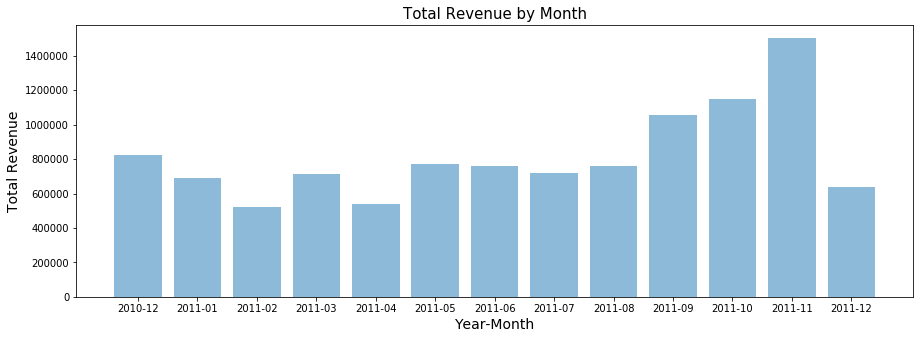

In [52]:
#Visualize visualize Revenue by Month
temp = df2.loc[:,('InvoiceDate','Revenue')]
temp.InvoiceDate = df2.InvoiceDate.dt.to_period('M')
temp = temp.groupby(['InvoiceDate'])['Revenue'].sum()
temp = temp.reset_index(drop = False)


plt.figure(figsize=(15,5))
plt.bar(np.arange(len(temp['InvoiceDate'])), temp['Revenue'], align='center', alpha=0.5)
plt.xticks(np.arange(len(temp['InvoiceDate'])), temp['InvoiceDate'])
plt.ylabel('Total Revenue',fontsize=14)
plt.xlabel('Year-Month',fontsize=14)
plt.title('Total Revenue by Month',fontsize=15)
 
plt.show()

In [53]:
#Now group the revenue by week
df2.RevWeek=df2.groupby(pd.Grouper(key='InvoiceDate', freq='W-MON'))['Revenue'].sum().reset_index().sort_values('InvoiceDate')
df2.RevWeek.head()

,InvoiceDate,Revenue
0,2010-12-06,239293.62
1,2010-12-13,312426.44
2,2010-12-20,204180.90
3,2010-12-27,65551.77
4,2011-01-03,NaN


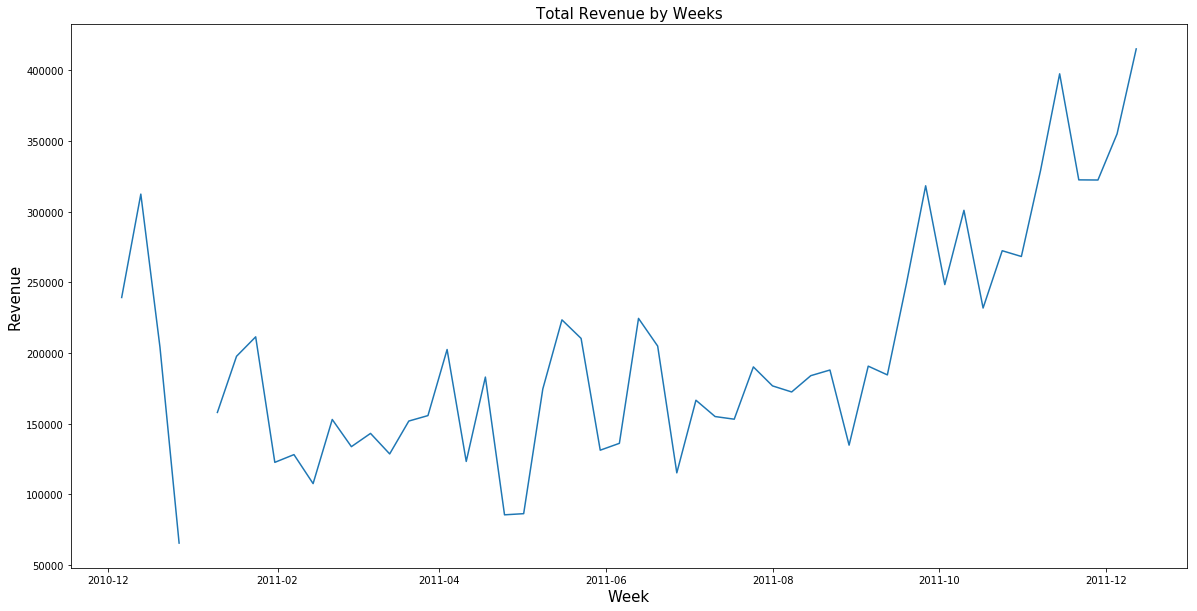

In [54]:
#Investigate therevenue trend by week(53 weeks in total)
Revenue1=df2.RevWeek.Revenue
Time1 =df2.RevWeek.InvoiceDate

plt.figure(figsize=(20,10))
plt.xlabel("Week",fontsize=15)
plt.ylabel("Revenue",fontsize=15)
plt.title('Total Revenue by Weeks',fontsize=15)
plt.plot(Time1,Revenue1)
plt.show()


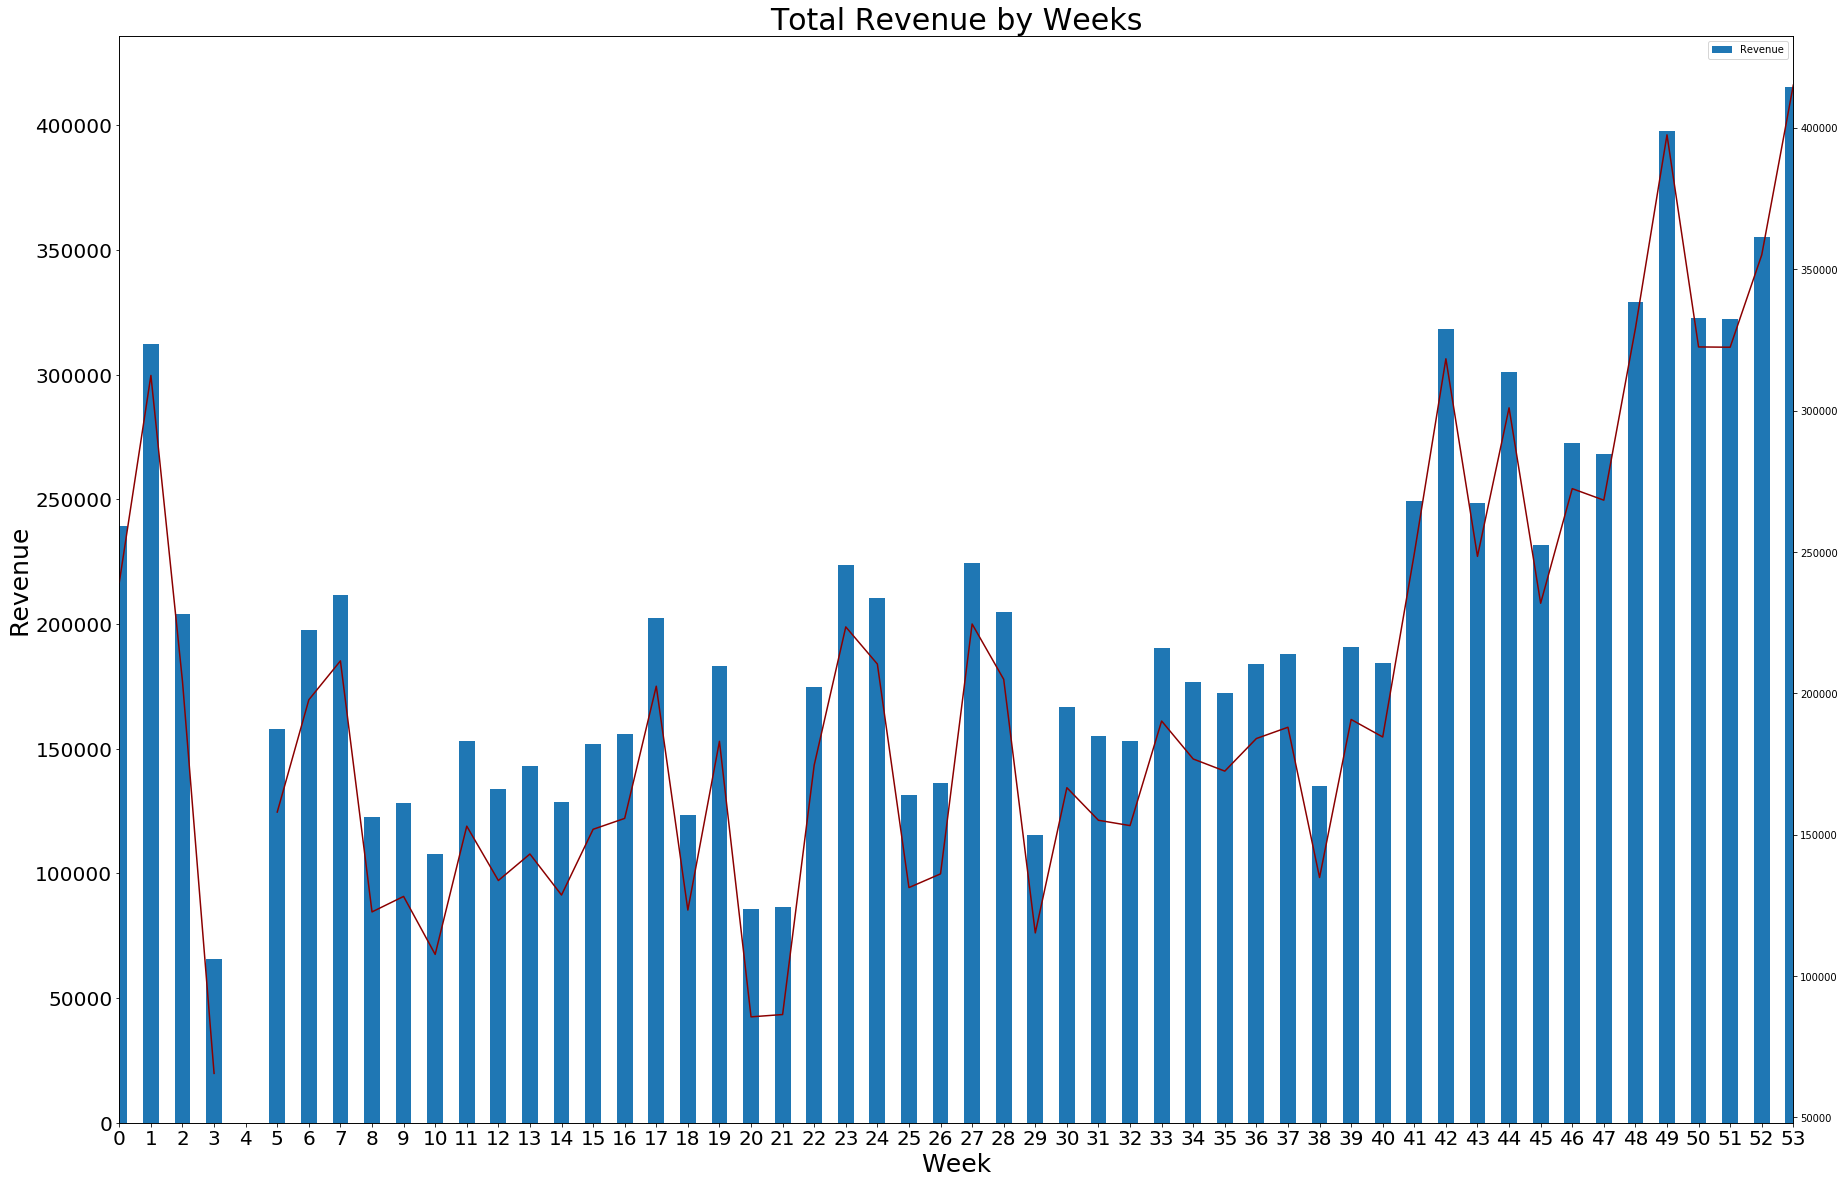

In [55]:
# Now we combine our weekly revenue line chart with weekly revenue bar chart for better visualization
#On the 4th week, there was no transaction
Revenue1=df2.RevWeek.Revenue
Time1 =df2.RevWeek.InvoiceDate
df2.RevWeek.plot(kind='bar', title ="Total Revenue By Week", figsize=(30, 20), legend=True, fontsize=20)
plt.title('Total Revenue by Weeks',fontsize=30)
plt.xlabel("Week",fontsize=25)
plt.ylabel("Revenue",fontsize=25)
df2.RevWeek['Revenue'].plot(secondary_y=True,color="#8b0000")
plt.show()
#we found out that our sales start to surge on week 41 onwards

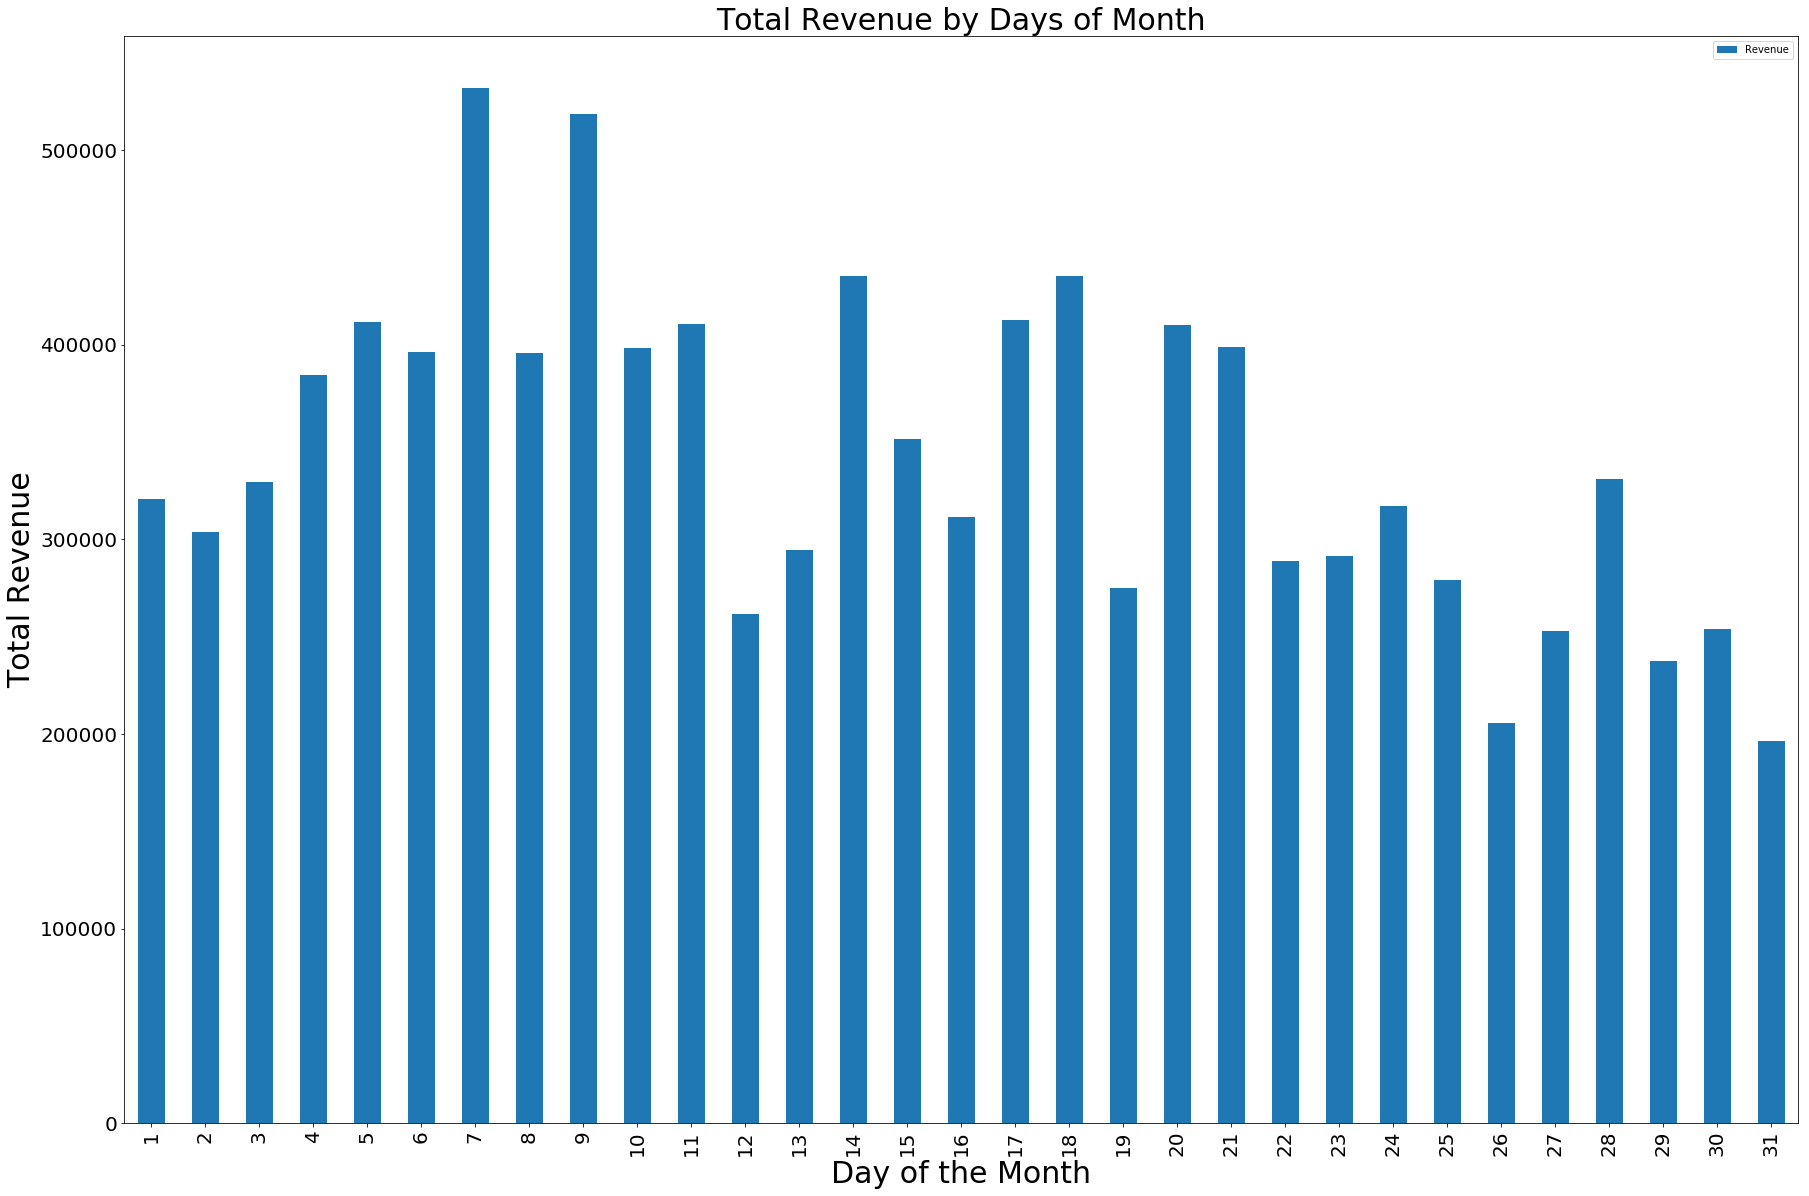

In [56]:
#We are going to investigate sales by days of the month
df_Dmonth=df2.copy()
df_Dmonth["day"]=df_Dmonth["InvoiceDate"].dt.day

df_Dmontha=df_Dmonth.groupby("day")["Revenue"].sum()
df_Dmontha.plot(kind='bar', title ="V comp", figsize=(30, 20), legend=True, fontsize=20)
plt.title('Total Revenue by Days of Month',fontsize=30)
plt.ylabel('Total Revenue', fontsize=30)
plt.xlabel('Day of the Month', fontsize=30)
plt.show()
# we concluded that the sale surge at the earlu of the monthand  dwindle as it reach the end of month

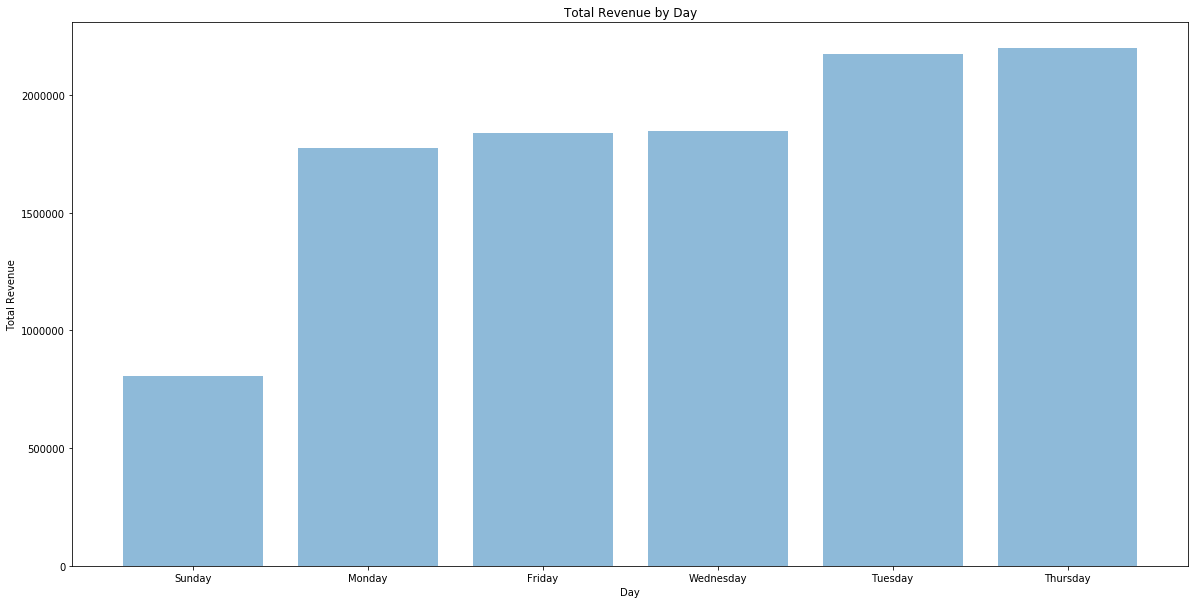

In [57]:
#To visualize Revenue by Day of the week
temp = df2.loc[:,('InvoiceDate','Revenue','CustomerID','InvoiceNo')]
temp2 = temp.groupby(temp['InvoiceDate'].dt.weekday_name)['Revenue'].sum().sort_values()
temp2 = temp2.reset_index(drop = False).rename(columns={'InvoiceDate':'Day'})


plt.figure(figsize=(20,10))
plt.bar(np.arange(len(temp2['Day'])), temp2['Revenue'], align='center', alpha=0.5)
plt.xticks(np.arange(len(temp2['Day'])), temp2['Day'])
plt.ylabel('Total Revenue')
plt.xlabel('Day')
plt.title('Total Revenue by Day')
 
plt.show()
#Tuesday and thursday show the highest revenue, No revenue on Saturday

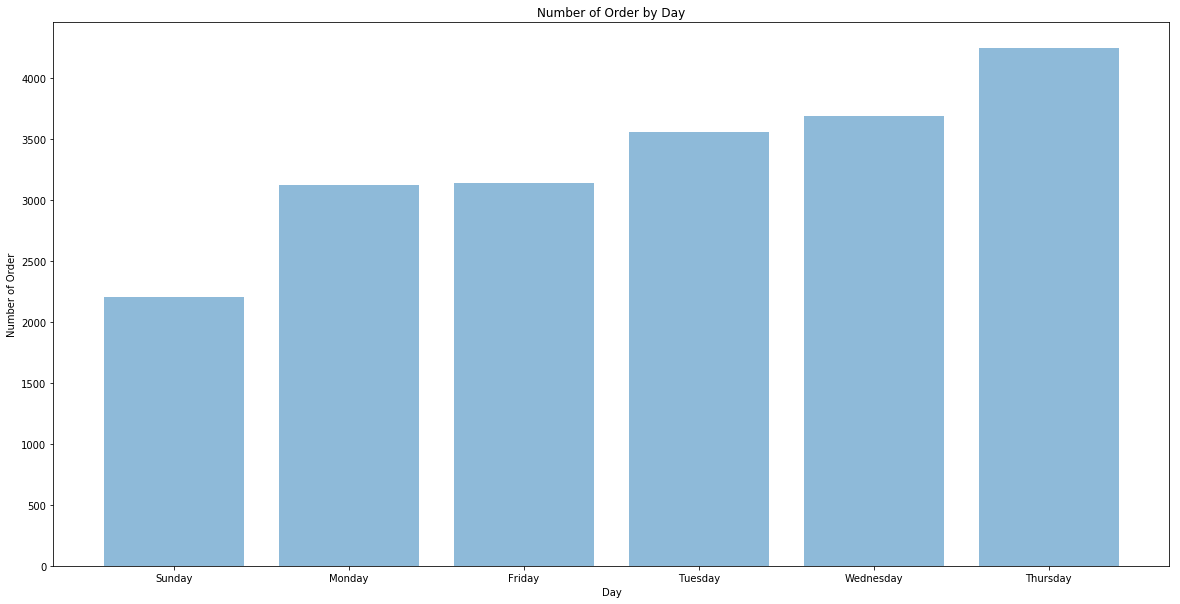

In [58]:
#To visualize No of Quantity Ordered by Day of the week
temp = df2.loc[:,('InvoiceDate','CustomerID','InvoiceNo')]
temp['InvoiceDate']=temp['InvoiceDate'].dt.weekday_name
temp3 = temp.groupby(['CustomerID','InvoiceNo','InvoiceDate']).count()
temp3 = temp3.reset_index(drop = False)

daycount = temp3['InvoiceDate'].value_counts().sort_values()
daycount = daycount.reset_index(drop = False).rename(
    columns={'index':'Day','InvoiceDate':'NumOrder'})

plt.figure(figsize=(20,10))
plt.bar(np.arange(len(daycount['Day'])), daycount['NumOrder'], align='center', alpha=0.5)
plt.xticks(np.arange(len(daycount['Day'])), daycount['Day'])
plt.ylabel('Number of Order')
plt.xlabel('Day')
plt.title('Number of Order by Day')
plt.show()

In [73]:
# Investigate relationship between Total Revenue, Quantity of order and Days of the week
join = pd.merge(temp2, daycount,  on='Day')
join['DayNum']=join['Day']
for i,j in enumerate(join['Day'],0):
    if j=='Monday':
        join.loc[i,'DayNum'] = 0
    elif j=='Tuesday':
        join.loc[i,'DayNum'] = 1
    elif j=='Wednesday':
        join.loc[i,'DayNum'] = 2
    elif j=='Thursday':
        join.loc[i,'DayNum'] = 3
    elif j=='Friday':
        join.loc[i,'DayNum'] = 4
    else: 
        join.loc[i,'DayNum'] = 5
join=join.sort_values('DayNum')
join

,Day,Revenue,NumOrder,DayNum
1,Monday,1775782.071,3126,0
4,Tuesday,2175700.511,3556,1
3,Wednesday,1847074.380,3690,2
5,Thursday,2199292.570,4246,3
2,Friday,1837470.491,3140,4
0,Sunday,806790.781,2204,5


In [74]:
#Now we are going to visualize revenue by season
Autumndata=df2.loc[df2['Season']=='Autumn']
Springdata=df2.loc[df2['Season']=='Spring']
Summerdata=df2.loc[df2['Season']=='Summer']
Winterdata=df2.loc[df2['Season']=='Winter']

autumn_revenue=sum(Autumndata['Revenue'])
autumn_revenue
autumn_qty=sum(Autumndata['Quantity'])
autumn_qty
spring_revenue=sum(Springdata['Revenue'])
spring_revenue
spring_qty=sum(Springdata['Quantity'])
spring_qty
summer_revenue=sum(Summerdata['Revenue'])
summer_revenue
summer_qty=sum(Summerdata['Quantity'])
summer_qty
winter_revenue=sum(Winterdata['Revenue'])
winter_revenue
winter_qty=sum(Winterdata['Quantity'])
winter_qty

seasonrevenues=[winter_revenue,spring_revenue,summer_revenue,autumn_revenue]
seasonqty=[winter_qty,spring_qty,summer_qty,autumn_qty]
seasons=['Winter','Spring','Summer','Autumn']
Data=list(zip(seasons,seasonrevenues,seasonqty))
Data1=pd.DataFrame(data=Data,columns=['Season','Revenue','Order Quantity'])
Data1

,Season,Revenue,Order Quantity
0,Winter,1585763.000,822381
1,Spring,2180351.121,1141862
2,Summer,2478336.861,1361047
3,Autumn,4152006.622,2091920


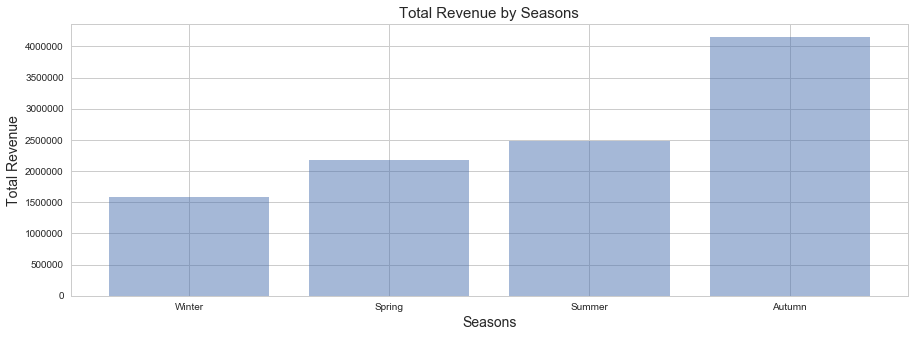

In [75]:
objects = ('Winter', 'Spring', 'Summer', 'Autumn')
y_pos = np.arange(len(objects))
orders = [winter_revenue,spring_revenue,summer_revenue,autumn_revenue]

plt.figure(figsize=(15,5))
plt.bar(y_pos, orders, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.xlabel('Seasons',fontsize=14)
plt.ylabel('Total Revenue',fontsize=14)
plt.title('Total Revenue by Seasons',fontsize=15)

plt.show()

In [76]:
sortqty=df2.sort_values('Quantity',ascending=False)
sortqty[0:5]

,InvoiceNo,InvoiceDate,InvoiceTime,Season,CustomerID,Country,StockCode,Description,Quantity,UnitPrice,Revenue
421632,573008,2011-10-27,12:26:00,Autumn,12901,United Kingdom,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,0.21,1008.00
206121,554868,2011-05-27,10:52:00,Spring,13135,United Kingdom,22197,SMALL POPCORN HOLDER,4300,0.72,3096.00
97432,544612,2011-02-22,10:43:00,Winter,18087,United Kingdom,22053,EMPIRE DESIGN ROSETTE,3906,0.82,3202.92
270885,560599,2011-07-19,17:04:00,Summer,14609,United Kingdom,18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,3186,0.06,191.16
52711,540815,2011-01-11,12:55:00,Winter,15749,United Kingdom,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2.10,6539.40


In [77]:
#Deleting outlier quantity
df2 = df2[~df2['Quantity'].isin(['80995','74215'])]

In [78]:
sortqty=df2.sort_values('Quantity',ascending=False)
sortqty[0:5]

,InvoiceNo,InvoiceDate,InvoiceTime,Season,CustomerID,Country,StockCode,Description,Quantity,UnitPrice,Revenue
421632,573008,2011-10-27,12:26:00,Autumn,12901,United Kingdom,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,0.21,1008.00
206121,554868,2011-05-27,10:52:00,Spring,13135,United Kingdom,22197,SMALL POPCORN HOLDER,4300,0.72,3096.00
97432,544612,2011-02-22,10:43:00,Winter,18087,United Kingdom,22053,EMPIRE DESIGN ROSETTE,3906,0.82,3202.92
270885,560599,2011-07-19,17:04:00,Summer,14609,United Kingdom,18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,3186,0.06,191.16
52711,540815,2011-01-11,12:55:00,Winter,15749,United Kingdom,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2.10,6539.40


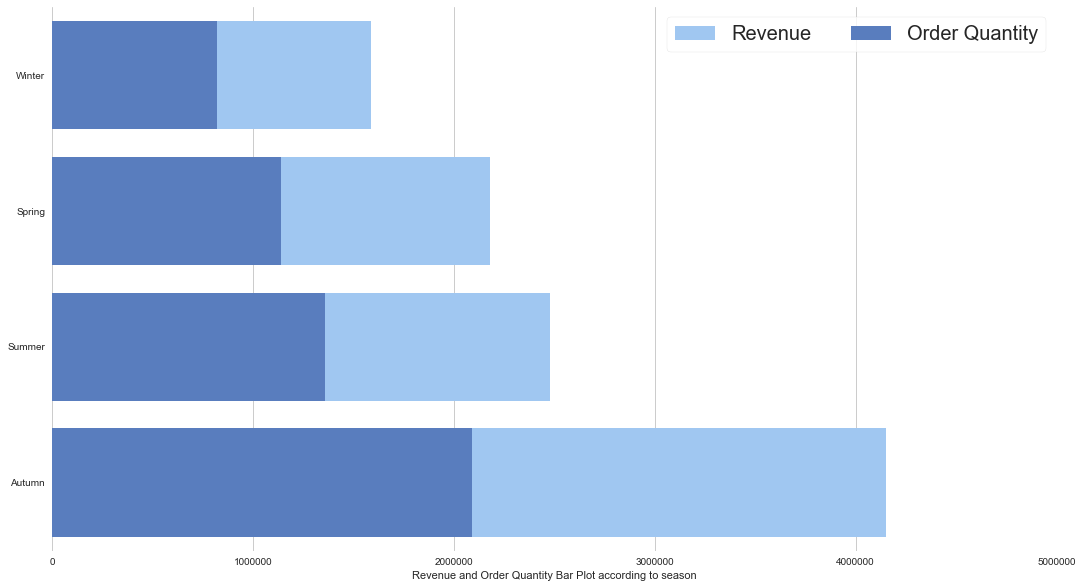

In [79]:
#Visualize the perforamnce of each season using Total revenue and Quantity ordered 
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(18, 10))

# Plot the season revenues
sns.set_color_codes("pastel")
sns.barplot(x="Revenue", y="Season", data=Data1,
            label="Revenue", color="b")

# Plot the season order quantity based on individual product
sns.set_color_codes("muted")
sns.barplot(x="Order Quantity", y="Season", data=Data1,
            label="Order Quantity", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper right", frameon=True, fontsize=20)
ax.set(xlim=(0, 5.000485e+06), ylabel="",
       xlabel="Revenue and Order Quantity Bar Plot according to season")
sns.despine(left=True, bottom=True)

plt.show()

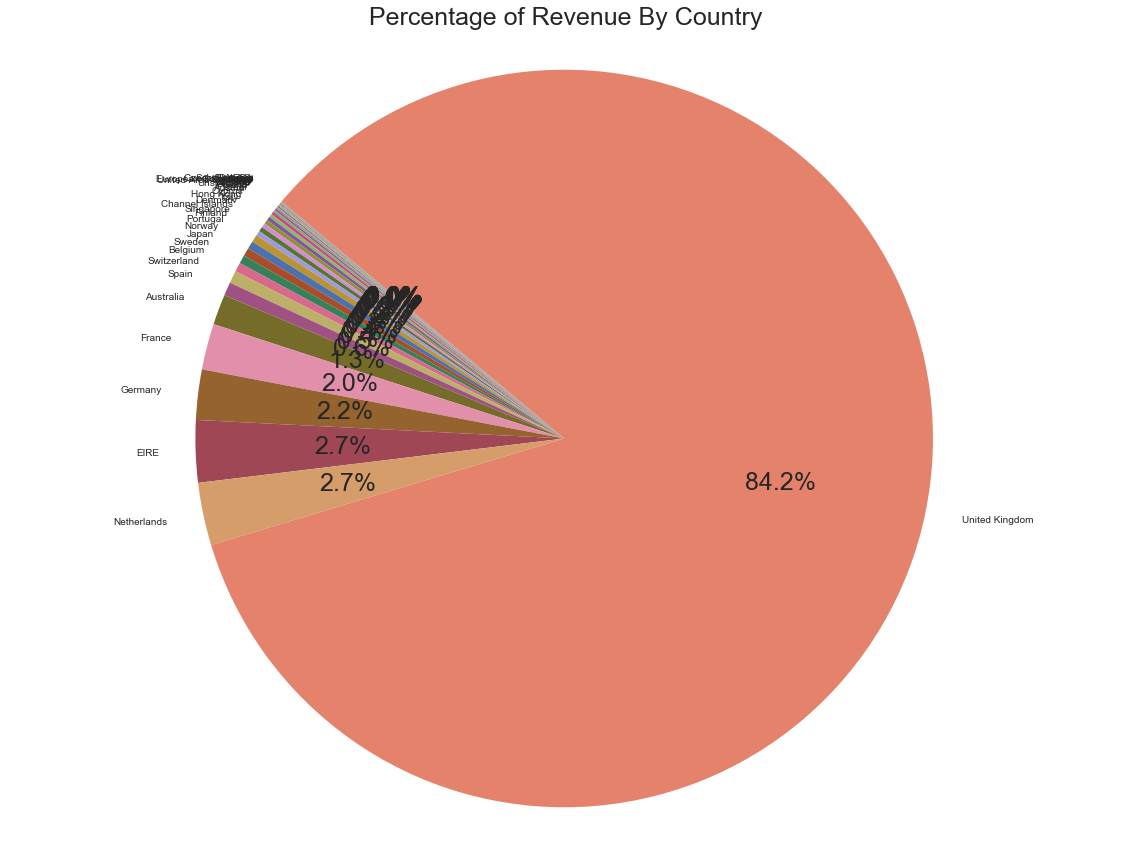

In [80]:
#Investigate the percentage for each country contribution to sales
import matplotlib as mpl
df2.CountryRev=df2.groupby(pd.Grouper(key='Country'))['Revenue'].sum().reset_index().sort_values('Revenue').round()
colors=["#3fc1bf","#d84e2d","#43c764","#9143b5","#6fbb3c","#585ed1","#b2c634","#c072e5","#3b8f37","#ce4dad","#90ab37","#6b86ed",
"#d4b436","#4a61b0","#df8830","#55a5db","#d33f4e","#5cbe8e","#da3e7f","#8bb96c","#8056a1","#8e9235","#d38bd4",
"#55762c","#9e98de","#bb9333","#4c72ae","#a84d27","#36815b","#d8698c","#bcb068","#9f5184","#756c2a","#e18fab","#95632e","#9f4755",
"#d59d6a","#e4826b"]

plt.figure(figsize=(20,15))
mpl.rcParams['font.size'] = 25
plt.pie(df2.CountryRev.Revenue,labels=df2.CountryRev.Country,colors=colors,autopct='%1.1f%%', startangle=140)

plt.axis('equal')
plt.title('Percentage of Revenue By Country',fontsize=25)
plt.show()

In [81]:
#Create df3 for pivot table
df3=df2.groupby([pd.Grouper(key='InvoiceDate', freq='M'),"Country"])['Revenue'].sum().reset_index().sort_values('InvoiceDate')

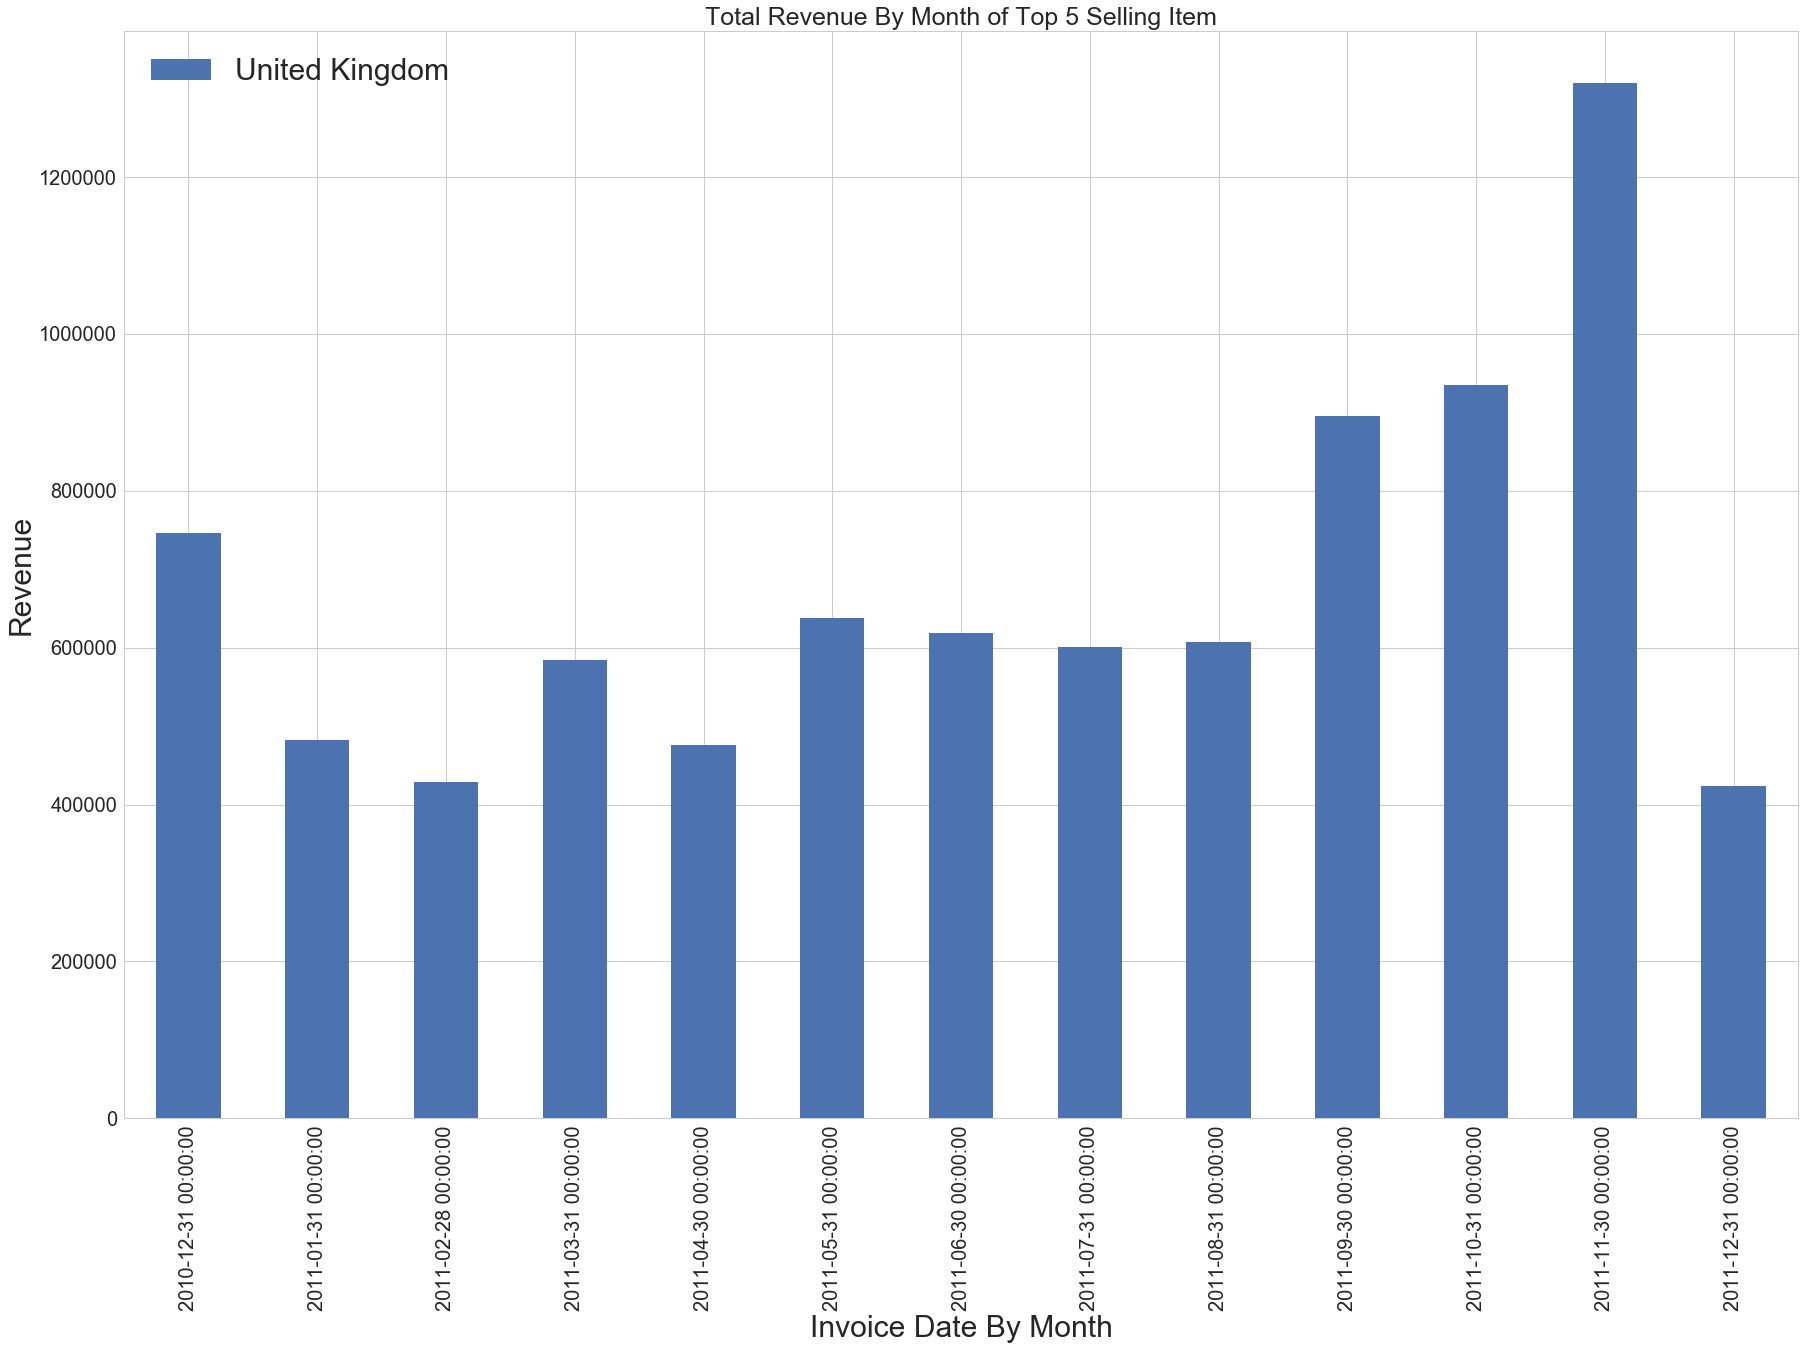

In [82]:
#Investigate revenue trend for U.K
df3a=df3[df3["Country"]=="United Kingdom"]
df3a.pivot(index="InvoiceDate", columns="Country", values="Revenue").plot(kind='bar', title ="Revenue From U.K", figsize=(30, 20), legend=True, fontsize=20)
plt.legend(loc=0, fontsize=30)
plt.title("Total Revenue By Month of Top 5 Selling Item",fontsize=25)
plt.ylabel('Revenue', fontsize=30)
plt.xlabel('Invoice Date By Month', fontsize=30)
plt.show()

In [83]:
#To visualize number of order by country
temp = df2[['CustomerID','InvoiceNo', 'Country']].groupby(['CustomerID','InvoiceNo', 'Country']).count()
temp = temp.reset_index(drop = False)

#count number country
countries = temp['Country'].value_counts()

#Plotting of choropleth map
data = dict(type='choropleth',
locations = countries.index,
locationmode = 'country names', z = countries,
text = countries.index, colorbar = {'title':'Number of Order'},
colorscale=[[0, 'rgb(228,255,255)'],
            [0.01, 'rgb(166,206,227)'], 
            [0.02, 'rgb(130,255,250)'],
            [0.03, 'rgb(31,120,180)'],
            [0.10, 'rgb(251,154,153)'], 
            [1, 'rgb(227,26,28)']],    
            reversescale = False)
layout = dict(title='Number of Order by Country', geo = dict(showframe = True, projection={'type':'Mercator'}))
choromap = go.Figure(data = [data], layout = layout)
py.iplot(choromap, validate=False)

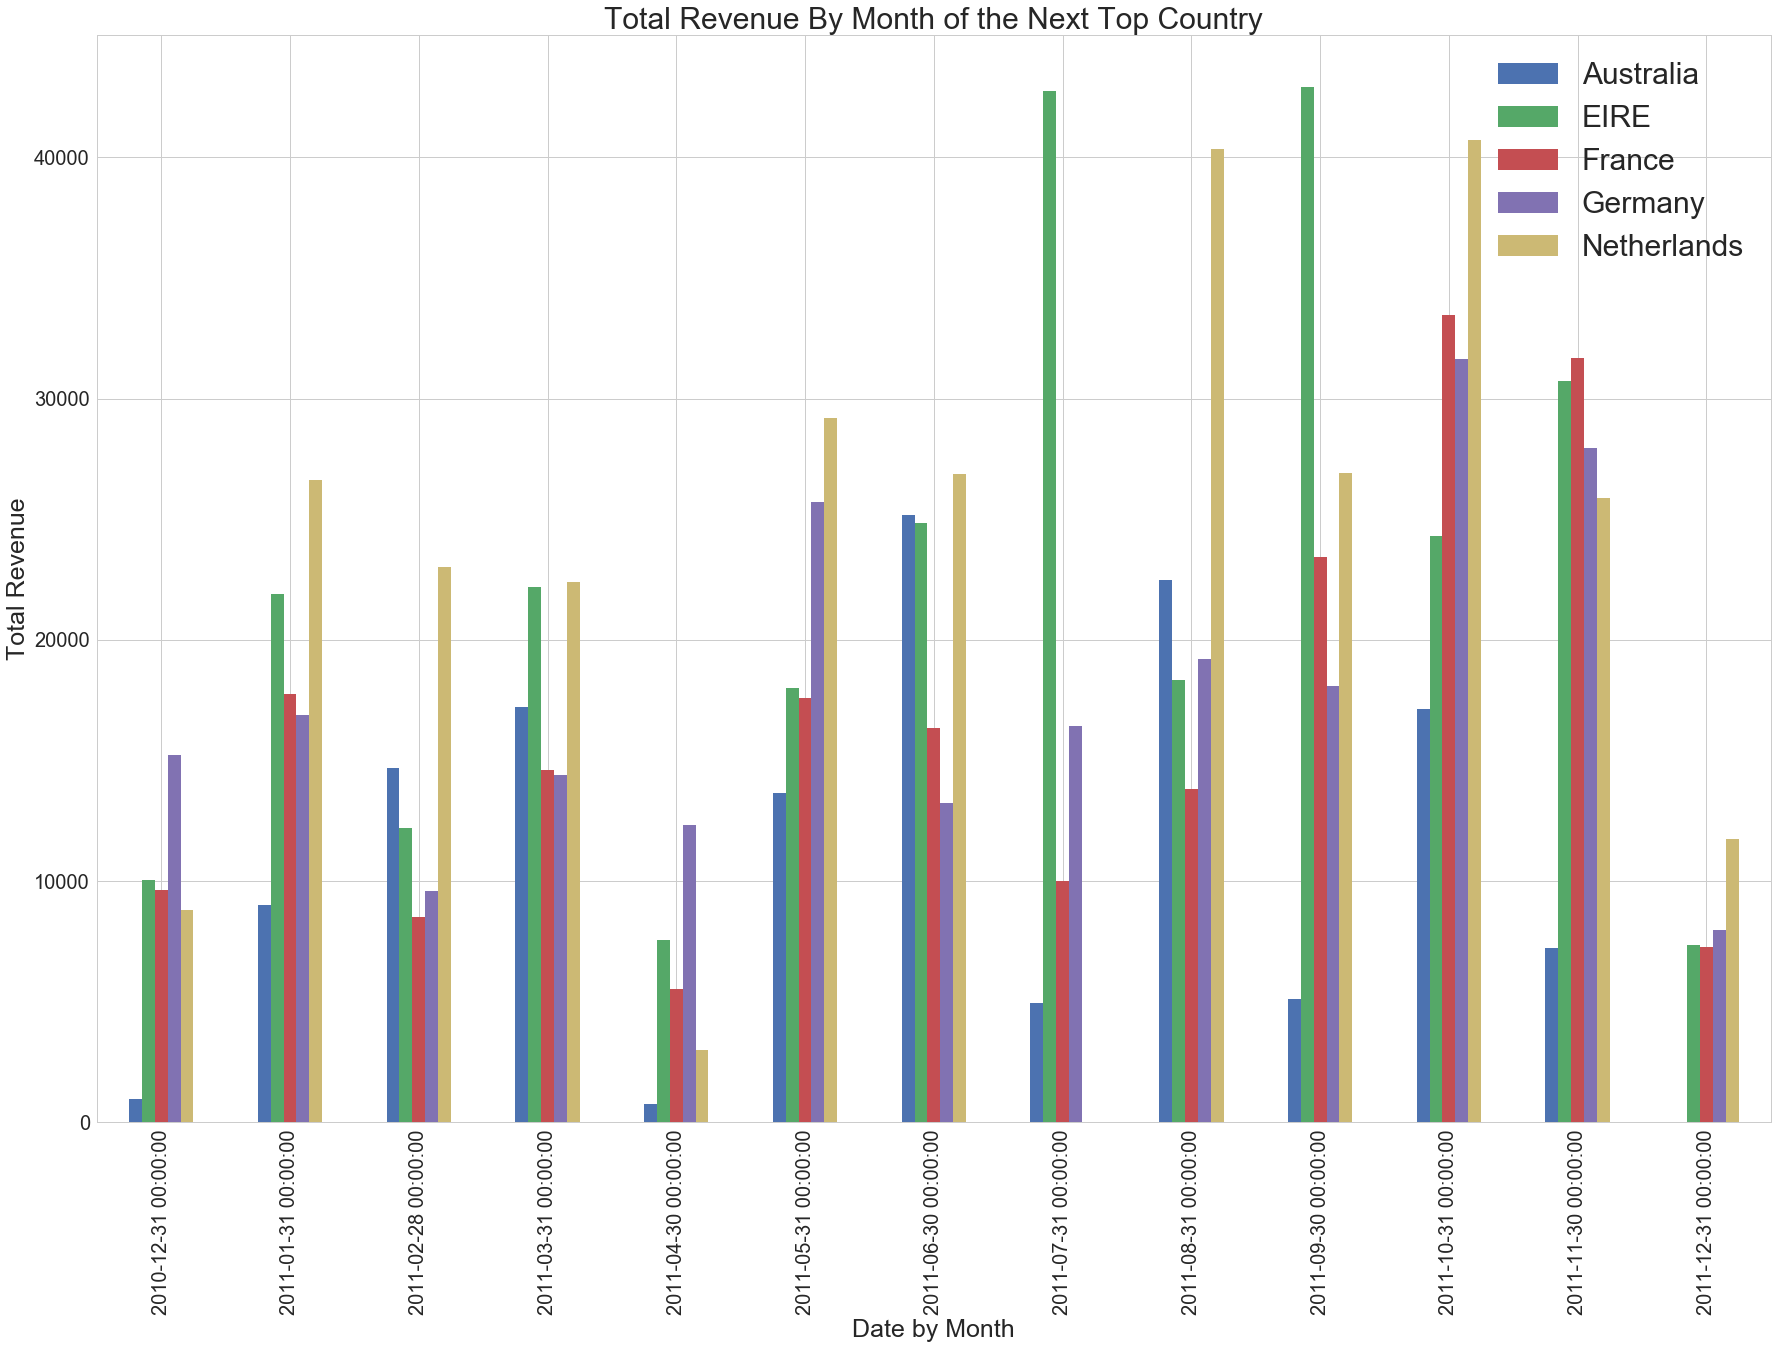

In [84]:
# Investigate the trend of revenue by top 5 follwong country 
df3b=df3[df3.Country.isin(["Australia","France","Germany","EIRE","Netherlands"])]
df3b.pivot(index="InvoiceDate", columns="Country", values="Revenue").plot(kind='bar', title ="Revenue from Following Top 5 Country", figsize=(30, 20), legend=True, fontsize=20)
plt.title("Total Revenue By Month of the Next Top Country",fontsize=30)
plt.ylabel('Total Revenue',fontsize=25)
plt.xlabel("Date by Month",fontsize=25)
plt.legend(loc=0, fontsize=30)
plt.show()


In [85]:
#Find the highest selling item
df3c=df2.groupby("StockCode")["Revenue"].sum().reset_index().sort_values(by=["Revenue"],ascending=False)
df3c.head(15)

,StockCode,Revenue
3801,DOT,206248.77
1305,22423,174156.54
3308,85123A,106415.23
2657,47566,99445.23
3292,85099B,94159.81
3809,POST,78101.88
3807,M,77752.82
1937,23084,66870.03
1001,22086,64875.59
3129,84879,58927.62


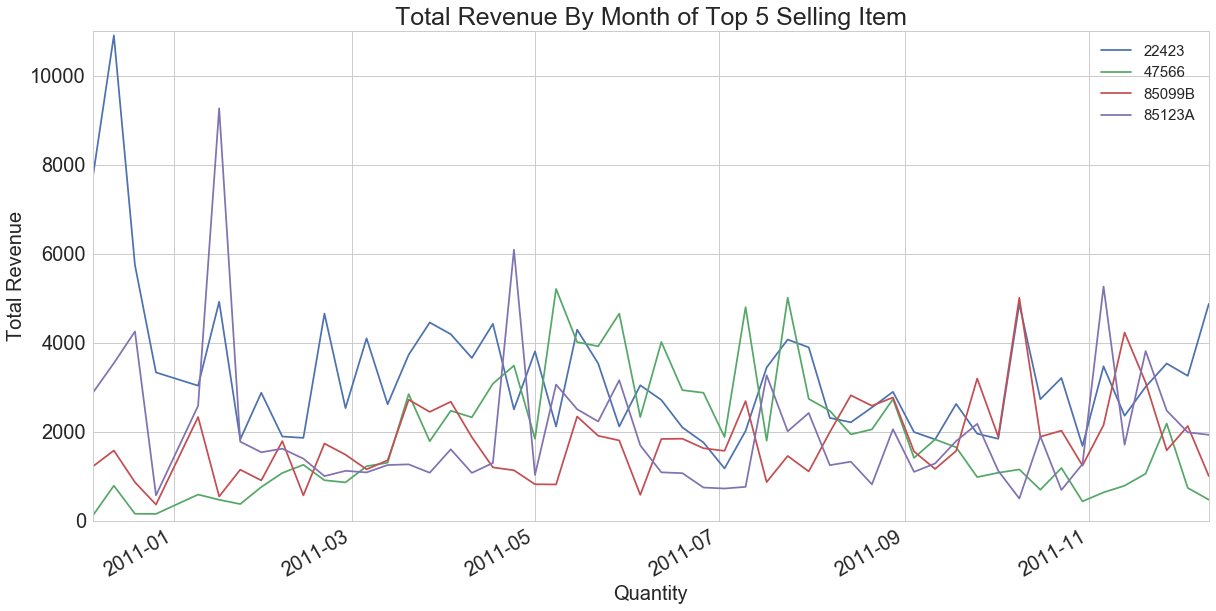

In [86]:
#Now lets see the transaction of top 5 selling item using the top 10 selling item we found above
import pylab as plot
df3d = df2[df2["StockCode"].isin(["22423","23843","85123A","47566","85099B"])]
df3d=df3d.groupby([pd.Grouper(key='InvoiceDate', freq='W'),"StockCode"])['Revenue'].sum().reset_index().sort_values('InvoiceDate')
df3d.pivot(index="InvoiceDate", columns="StockCode", values="Revenue").plot(figsize=(20, 10),fontsize=10)
plt.ylim(0, 11000)
plt.ylabel('Total Revenue',fontsize=20)
plt.xlabel("Quantity",fontsize=20)
plt.title("Total Revenue By Month of Top 5 Selling Item",fontsize=25)
plot.tick_params(axis='both', which='major', labelsize=20)
plot.legend(loc=1, prop={'size': 15})
plt.show()
#There were no meaningful trend for 5 top selling items

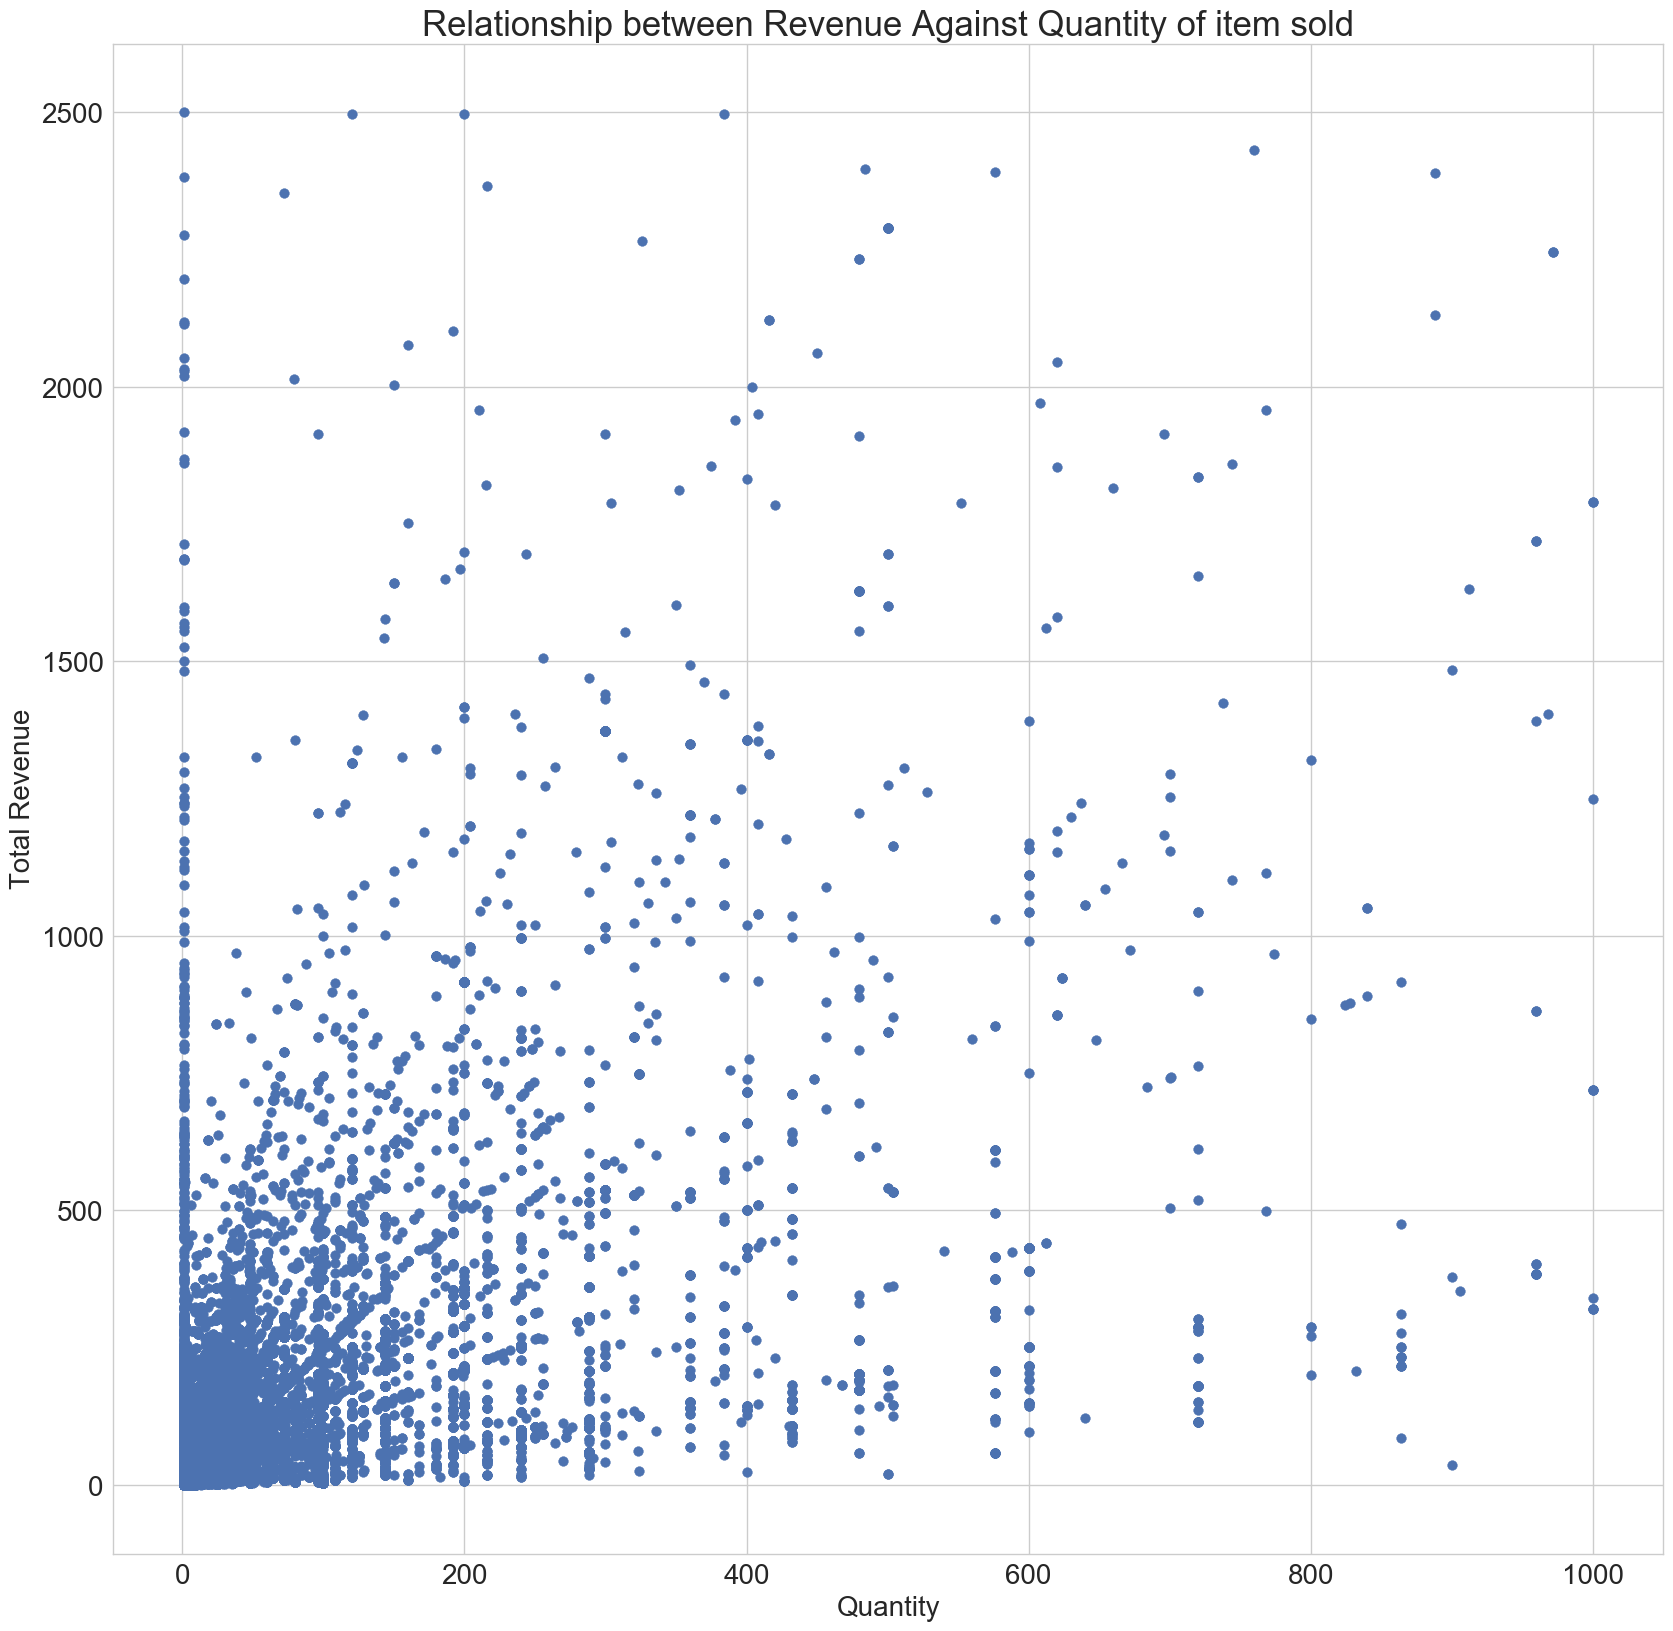

In [87]:
#We try to see the relation ship between quantity sold witg revenue
df3f=df2[(df2["Quantity"]<=1000) & (df2["Revenue"]<=2500)]
plt.figure(figsize=(20,20), dpi=100)
plt.scatter(df3f.Quantity, df3f.Revenue)
plt.ylabel('Total Revenue',fontsize=20)
plt.xlabel("Quantity",fontsize=20)
plot.tick_params(axis='both', which='major', labelsize=20)
plt.title('Relationship between Revenue Against Quantity of item sold',fontsize=25)
plt.show()
#From the chart below, our quantity of item sold conctrated a area around 100

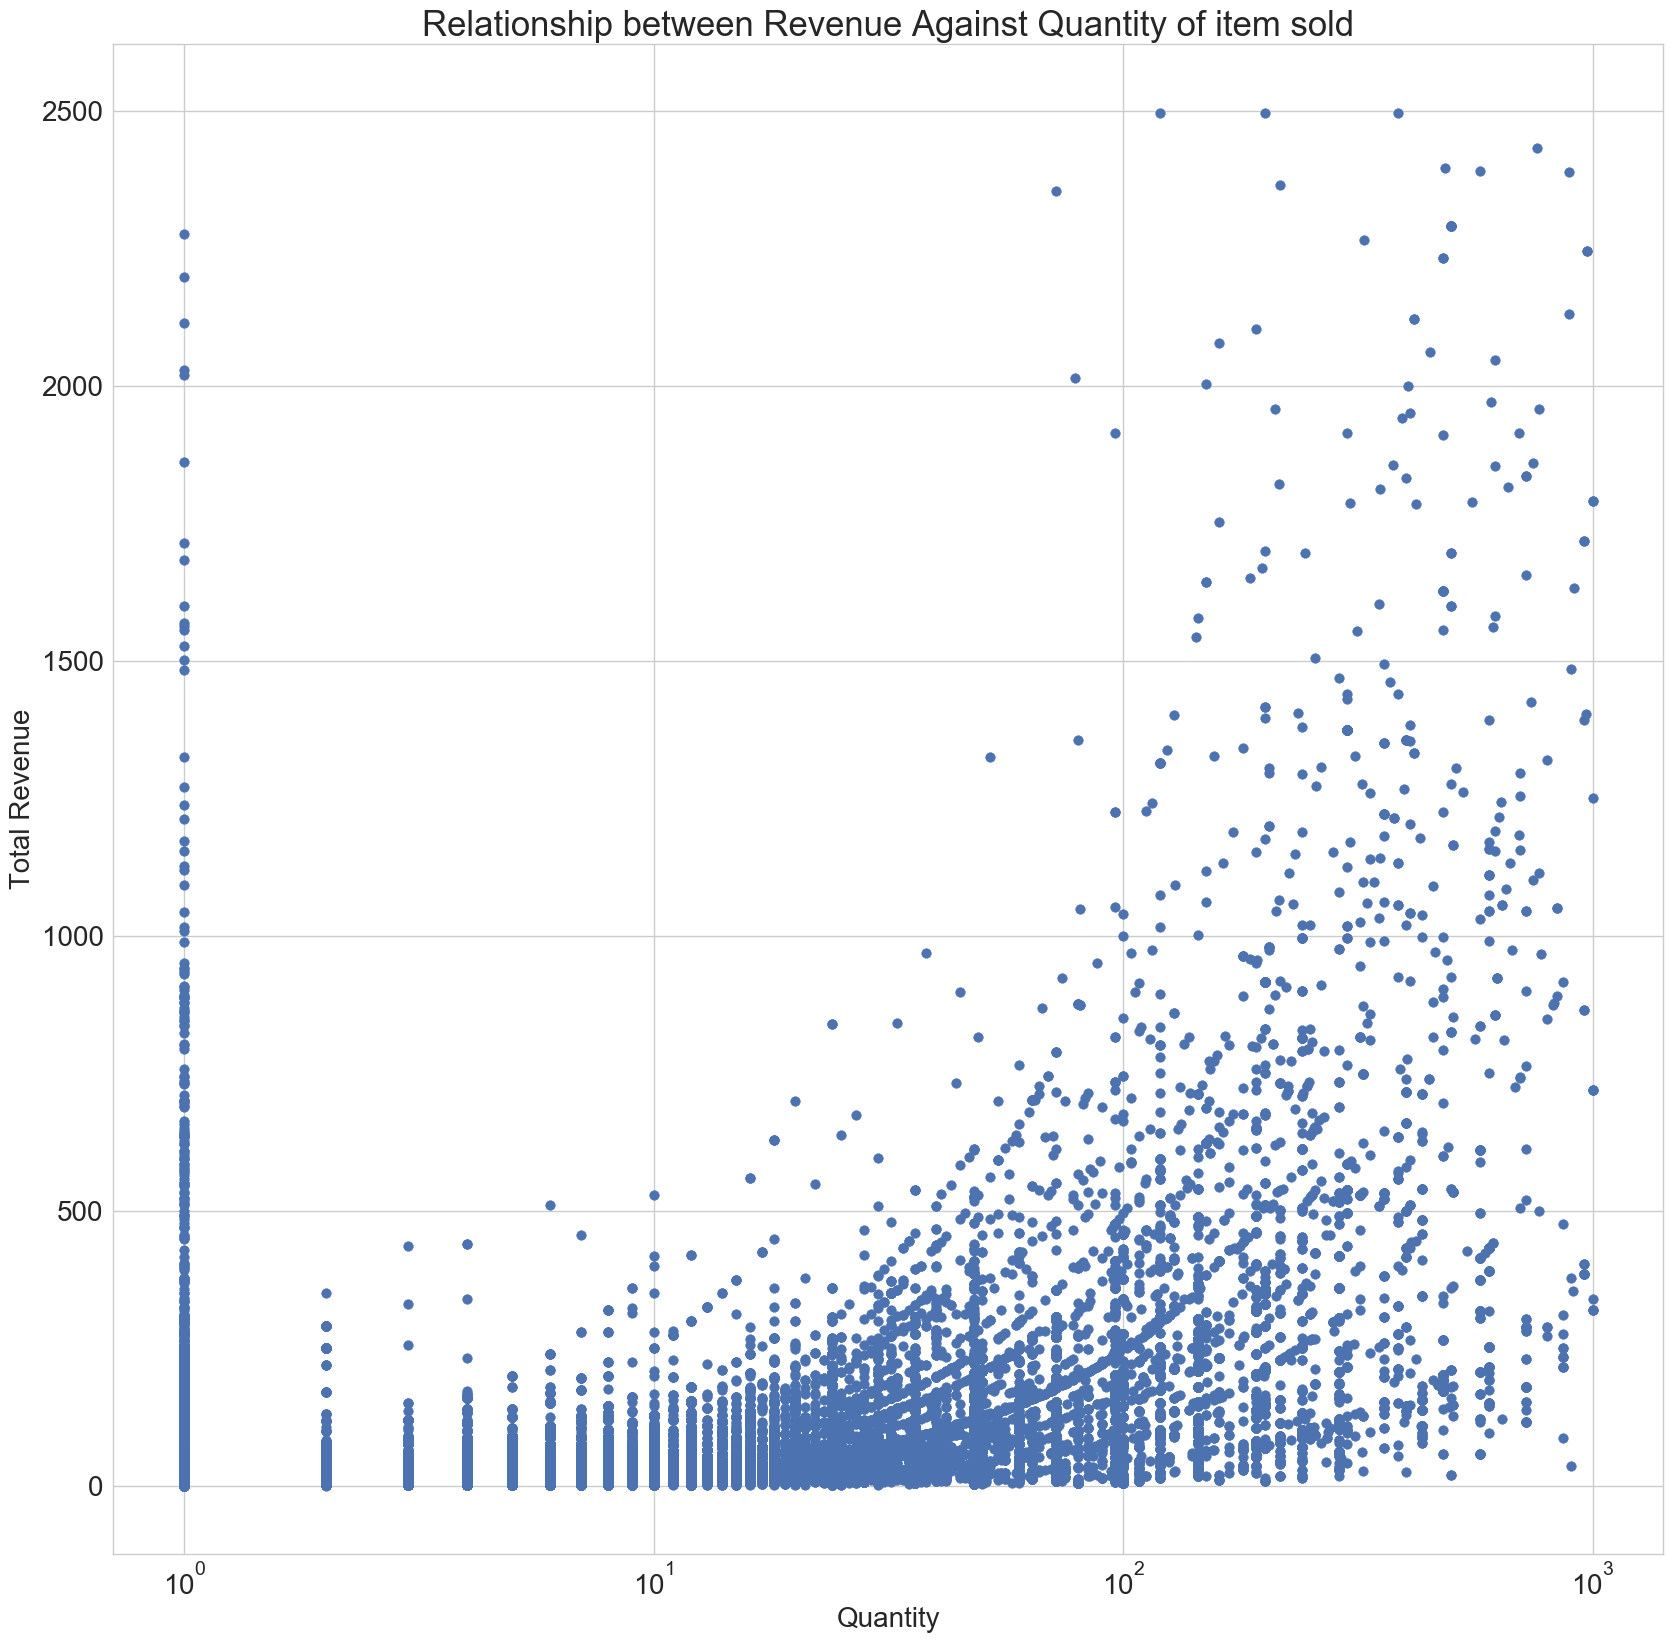

In [88]:
#we use log scale for x axis to have better view of unit sold at 100 in the same scatter plot
remove=["AMAzon","Manual","Dotcom"]
df3e=df2[~df2.Description.str.contains('|'.join(remove),case=True, na=False)]
df3e=df3e[(df3e["Quantity"]<=1000) & (df3e["Revenue"]<=2500)]
plt.figure(figsize=(20, 20), dpi=100)
plt.scatter(df3e.Quantity, df3e.Revenue)
plt.xscale("log")
plt.ylabel('Total Revenue',fontsize=20)
plt.xlabel("Quantity",fontsize=20)
plt.title('Relationship between Revenue Against Quantity of item sold',fontsize=25)
plot.tick_params(axis='both', which='major', labelsize=20)
plt.show()
#from this, we can assume most of our revenue came from quantity between 10-99

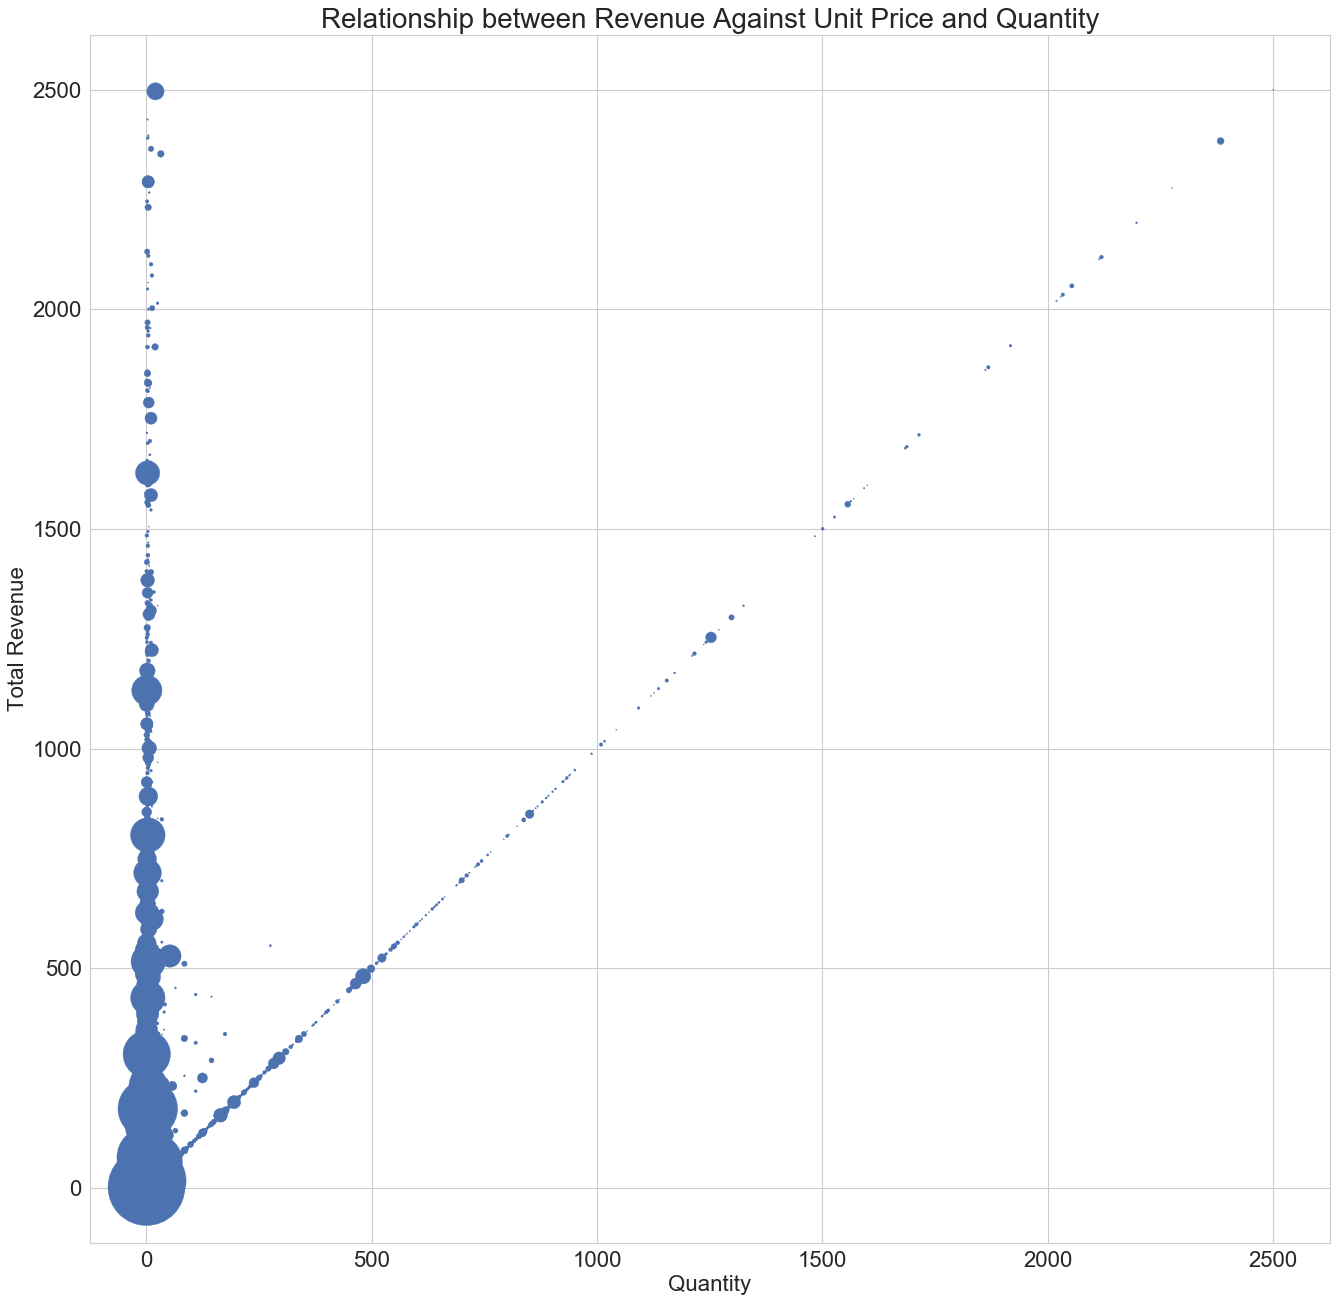

In [89]:
#we focus to find correlation betwen Revenue and Unit price with quantity as size of dot
np_bin=np.array(df2.Quantity)
df3g=df2[(df2["Quantity"]<=1000) & (df2["Revenue"]<=2500)]
plt.figure(figsize=(20, 20), dpi=80)
plt.scatter(df3g.UnitPrice, df3g.Revenue, s=np_bin)
plt.ylabel('Total Revenue',fontsize=20)
plt.xlabel("Quantity",fontsize=20)
plt.title('Relationship between Revenue Against Unit Price and Quantity',fontsize=25)
plot.tick_params(axis='both', which='major', labelsize=20)
plt.show()
#we found out that most of the revenue made from lower unit price of item and high volume of quantity

In [90]:
#To investigate which price range of item that contribute to the bottom line revenue, we assign each unit price based on price range
df3h=df2.copy()
df3h['PriceRange'] = pd.cut(df3h['UnitPrice'], [0, 2, 4,6,8,10,50,100,100000], labels=['0-2', '2-4', '4-6',"6-8","8-10","10-50","50-100","100-100000"])
#df3h.groupby("bin").count()
df3ha=df3h.groupby("PriceRange")['Revenue'].sum().reset_index().sort_values('Revenue', ascending=False).round()
df3ha
# we concluded that the price range below 6 dollar made the bulk revenue to the retailer

,PriceRange,Revenue
0,0-2,3712319.0
1,2-4,2713760.0
2,4-6,1606719.0
5,10-50,857589.0
3,6-8,573807.0
4,8-10,542464.0
7,100-100000,374243.0
6,50-100,15557.0


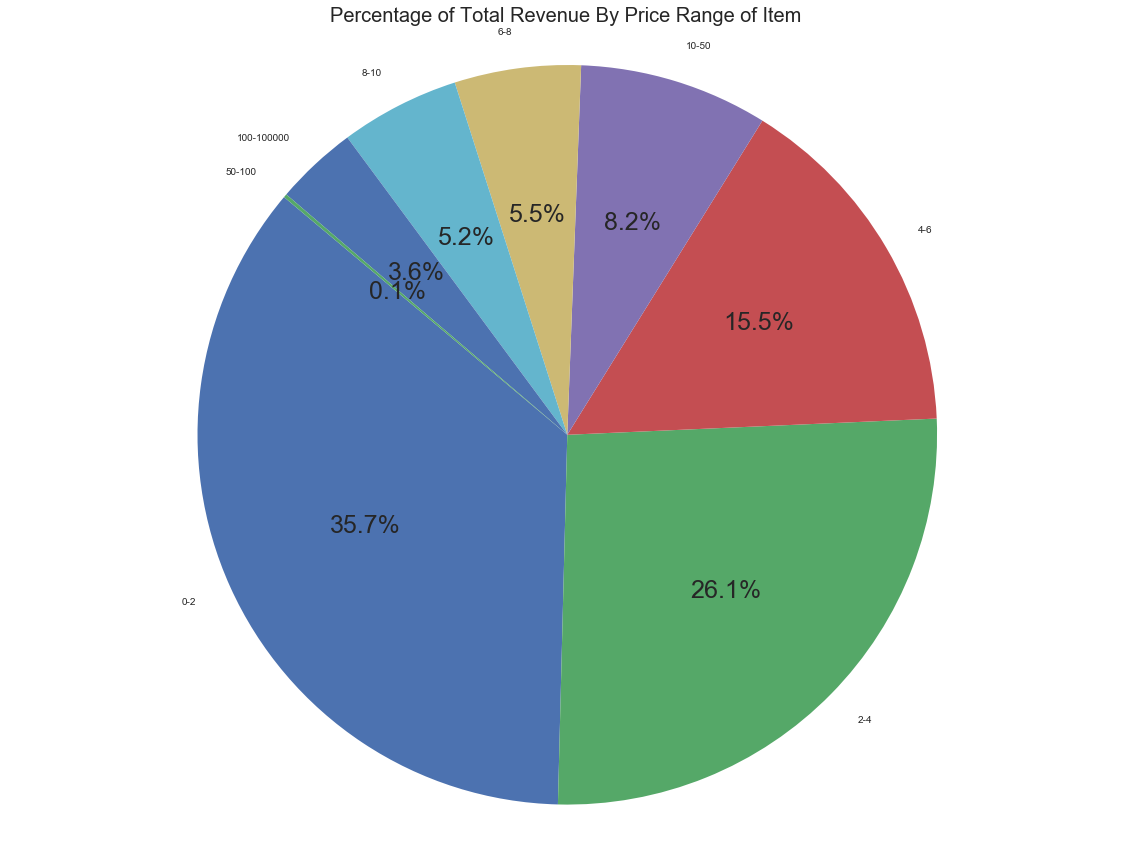

In [91]:
# Investigate the percentage of Total Revenue by different price range item using pie chart
import matplotlib as mpl
plt.figure(figsize=(20,15))
plt.pie(df3ha.Revenue,labels=df3ha.PriceRange,autopct='%1.1f%%', startangle=140)
mpl.rcParams['font.size'] = 20
plt.axis('equal')
plt.title('Percentage of Total Revenue By Price Range of Item',fontsize=20)
plt.show()

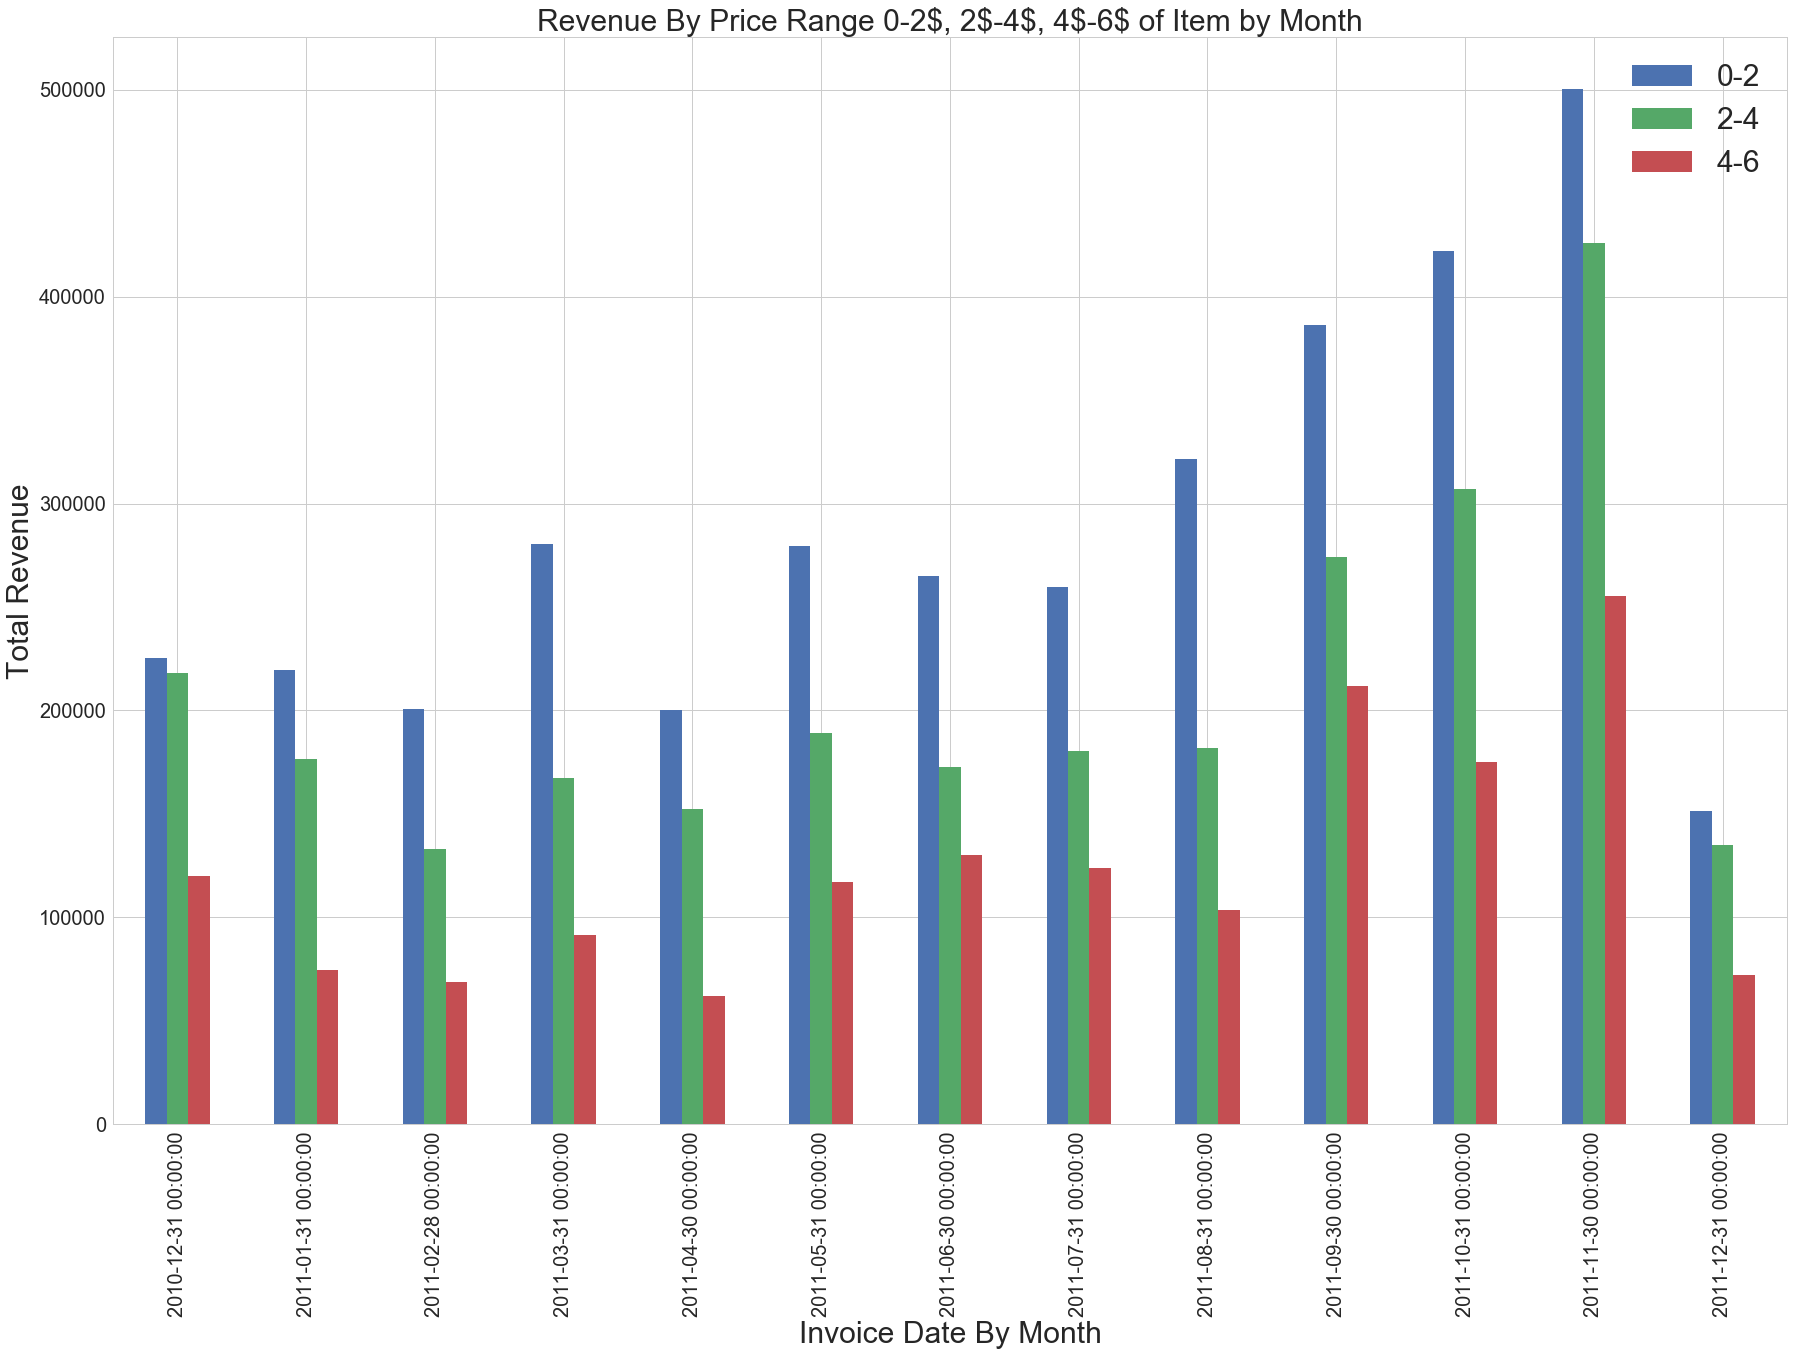

In [92]:
#Investigate the performance of top 3 range of unit price item(0-2 dollar, 2-4 dollar, 4-6 dollar) throught out the year
df3ha1=df3h[df3h.PriceRange.isin(["0-2","2-4","4-6"])]
df3ha2=df3ha1.groupby([pd.Grouper(key='InvoiceDate', freq='M'),"PriceRange"])['Revenue'].sum().reset_index().sort_values('InvoiceDate')
df3ha2.pivot(index="InvoiceDate", columns="PriceRange", values="Revenue").plot(kind='bar', title ="Revenue from Following Top 5 Country", figsize=(30, 20), legend=True, fontsize=20)
plt.legend(loc=0, fontsize=30)
plt.title('Revenue By Price Range 0-2$, 2$-4$, 4$-6$ of Item by Month',fontsize=30)
plt.ylabel('Total Revenue', fontsize=30)
plt.xlabel('Invoice Date By Month', fontsize=30)
plt.show()
#our finding show that the sales of  top 3 range of unit price item surge during Autumn

In [93]:
#we try to find out why the revenue spike during autum season, we suspect that the sale increase due to christmast
df3ib_christmast=df3h[df3h['Description'].str.contains("christ",case=False, na=False)]

In [94]:
#Investigate how much revenue generated by christmast product 
df3ib=df3ib_christmast.groupby(pd.Grouper(key='InvoiceDate', freq='M'))['Revenue'].sum().reset_index().sort_values('InvoiceDate')
df3ib
# christmast item made up $460,000 ou of 10,642,000 annual sales  which made around 4.3% of the total sales

,InvoiceDate,Revenue
0,2010-12-31,40950.29
1,2011-01-31,1952.26
2,2011-02-28,644.28
3,2011-03-31,772.92
4,2011-04-30,475.10
5,2011-05-31,1288.60
6,2011-06-30,3195.71
7,2011-07-31,12484.07
8,2011-08-31,24006.20
9,2011-09-30,80247.61


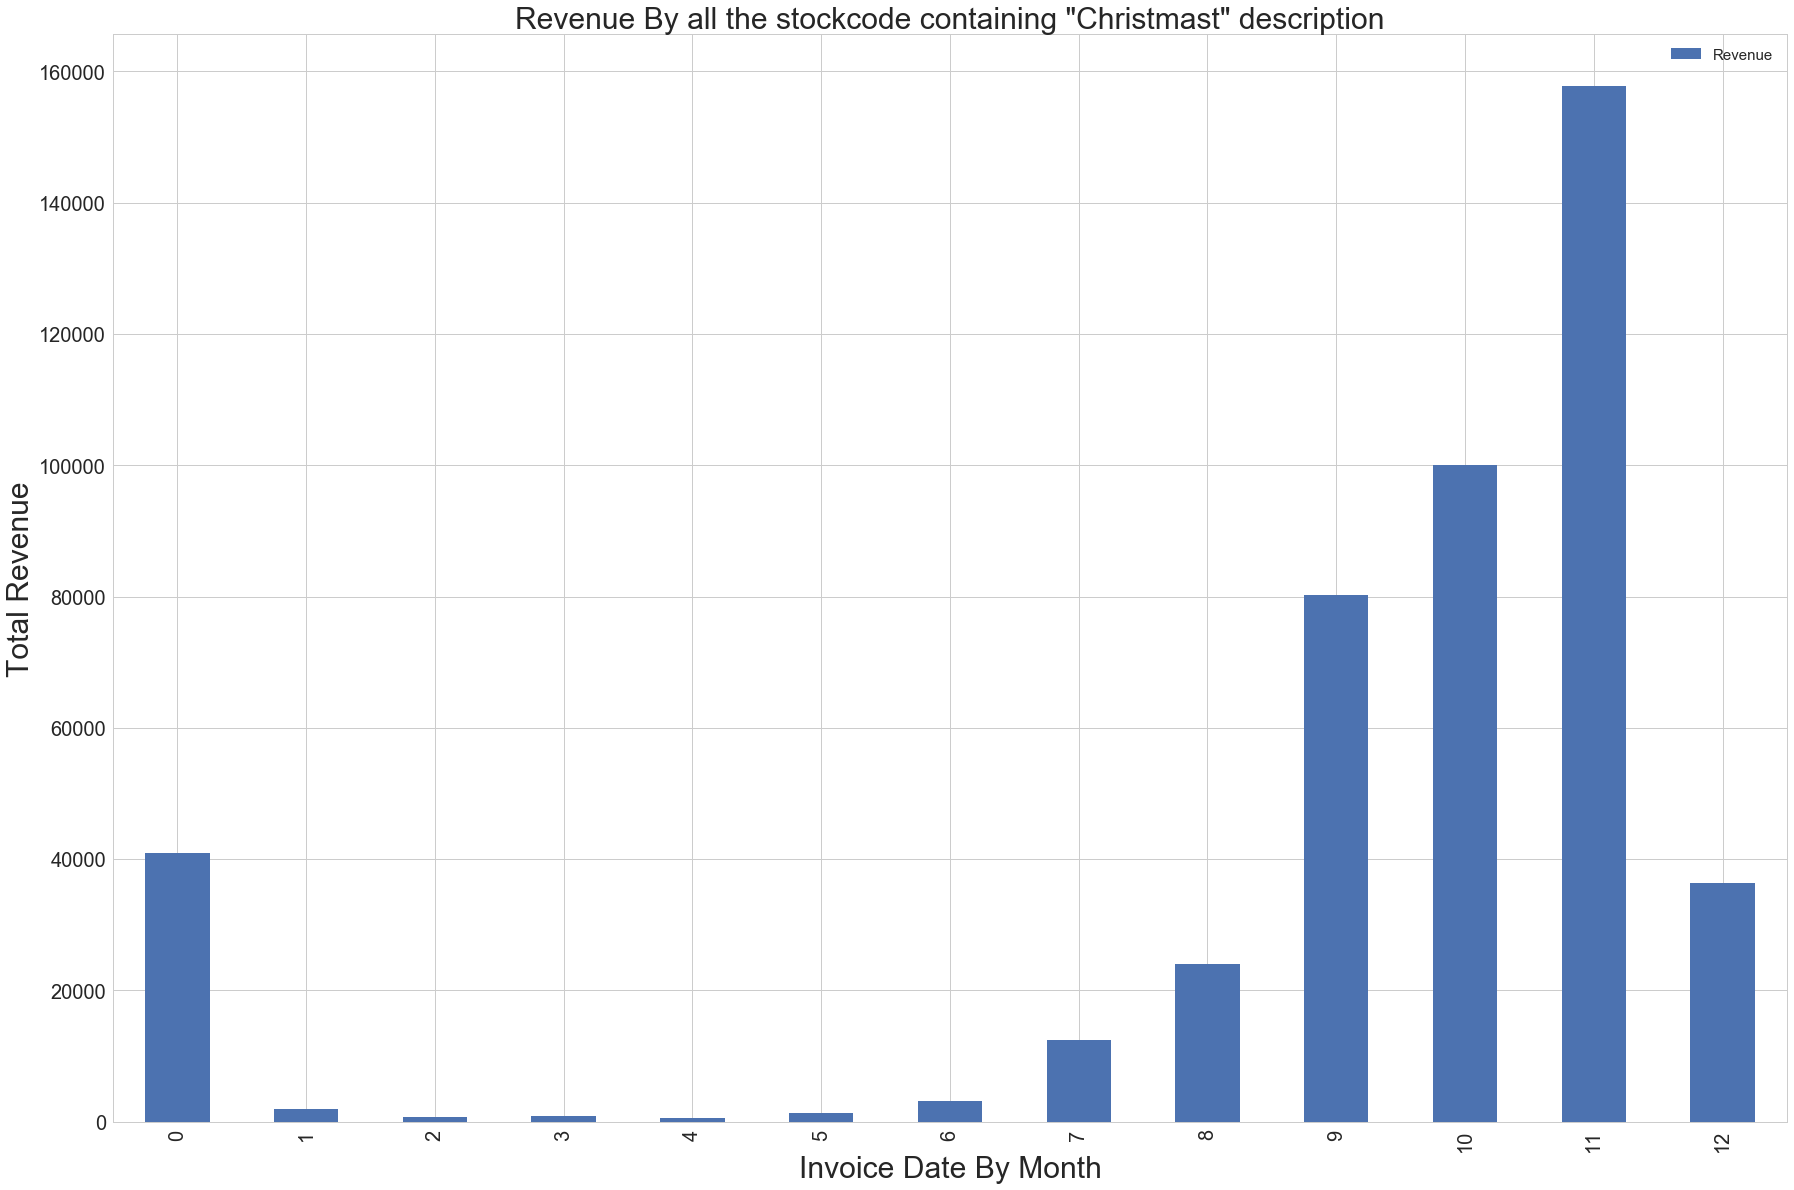

In [95]:
#plot bar chart for the stock code that contain "Christmast" in the description
df3ib.plot(kind='bar', title ="V comp", figsize=(30, 20), legend=True, fontsize=20)
plt.title('Revenue By all the stockcode containing "Christmast" description',fontsize=30)
plt.ylabel('Total Revenue', fontsize=30)
plt.xlabel('Invoice Date By Month', fontsize=30)
plt.legend(loc=1, fontsize=15)
plt.show()

In [96]:
# Chech all the stock code the contain word "Christmast" in the description
df3ib_christmast.head(10)

,InvoiceNo,InvoiceDate,InvoiceTime,Season,CustomerID,Country,StockCode,Description,Quantity,UnitPrice,Revenue,PriceRange
46,536371,2010-12-01,09:00:00,Autumn,13748,United Kingdom,22086,PAPER CHAIN KIT 50'S CHRISTMAS,80,2.55,204.0,2-4
122,536381,2010-12-01,09:41:00,Autumn,15311,United Kingdom,22086,PAPER CHAIN KIT 50'S CHRISTMAS,4,2.95,11.8,2-4
172,536385,2010-12-01,09:56:00,Autumn,17420,United Kingdom,85049A,TRADITIONAL CHRISTMAS RIBBONS,12,1.25,15.0,0-2
197,536389,2010-12-01,10:03:00,Autumn,12431,Australia,22941,CHRISTMAS LIGHTS 10 REINDEER,6,8.50,51.0,8-10
211,536390,2010-12-01,10:19:00,Autumn,17511,United Kingdom,22941,CHRISTMAS LIGHTS 10 REINDEER,2,8.50,17.0,8-10
218,536390,2010-12-01,10:19:00,Autumn,17511,United Kingdom,22910,PAPER CHAIN KIT VINTAGE CHRISTMAS,40,2.55,102.0,2-4
219,536390,2010-12-01,10:19:00,Autumn,17511,United Kingdom,20668,DISCO BALL CHRISTMAS DECORATION,288,0.10,28.8,0-2
382,536402,2010-12-01,11:22:00,Autumn,15513,United Kingdom,22086,PAPER CHAIN KIT 50'S CHRISTMAS,40,2.55,102.0,2-4
383,536402,2010-12-01,11:22:00,Autumn,15513,United Kingdom,22910,PAPER CHAIN KIT VINTAGE CHRISTMAS,40,2.55,102.0,2-4
475,536408,2010-12-01,11:41:00,Autumn,14307,United Kingdom,22812,PACK 3 BOXES CHRISTMAS PANNETONE,12,1.95,23.4,0-2


In [97]:
#Investigate the most frequent used word in description, to see if we can categorized them
from IPython.display import display, HTML
df3Desc=df2.Description.str.split(expand=True).stack().value_counts().to_frame().reset_index()
df3Desc.head(10)
# we found out that 2366 of types words used for the description. We concluded due to the time and tehnical constaint, we did not
# proceed with categorizing the product based on the types of words

,index,0
0,SET,53069
1,OF,52015
2,BAG,50823
3,RED,41742
4,HEART,37841
5,RETROSPOT,34124
6,VINTAGE,32964
7,DESIGN,29200
8,PINK,28869
9,CHRISTMAS,24587


In [98]:
#Analyze the revenue based on Customer ID
#We try to find repeating monthly purchase customer
from IPython.display import display, HTML
df3k=df2[~df2['CustomerID'].str.contains("r",case=False, na=False)]
df3k=df3k.groupby([pd.Grouper(key='InvoiceDate', freq='M'),"CustomerID"])['Revenue'].sum().reset_index().sort_values('InvoiceDate')
df3k["Month"]=pd.DatetimeIndex(df3k["InvoiceDate"]).month
#df3k["frequency"]=
df3ka=df3k.groupby('CustomerID').count().reset_index().sort_values(by="Month", ascending=False)
HTML(df3ka.to_html())
df3kb=df3k.groupby(["CustomerID"]).count().sort_values(by="Month", ascending=False)
HTML(df3ka.to_html())
df3k["Occurance"]=df3k.groupby("CustomerID")["CustomerID"].transform(pd.Series.value_counts)
df3k.head()
#Occurance colum will show how many time in a year that a unique customer purchase is

,InvoiceDate,CustomerID,Revenue,Month,Occurance
0,2010-12-31,12347,711.79,12,7
584,2010-12-31,16531,92.82,12,6
585,2010-12-31,16539,747.25,12,3
586,2010-12-31,16546,299.40,12,2
587,2010-12-31,16550,554.66,12,4


In [99]:
#We try to the frequency of occurance based on monhly historical purchase for each customer ID 
df3m=df3k.groupby("CustomerID")["Occurance"].count().reset_index().sort_values('Occurance',ascending=False)
df3m.groupby("Occurance").count().reset_index().sort_values('Occurance',ascending=False)

,Occurance,CustomerID
12,13,44
11,12,40
10,11,41
9,10,59
8,9,74
7,8,87
6,7,95
5,6,171
4,5,266
3,4,380


<h4>Customer Frequency of purchase can be described as below</h4>
<br>44 customer ID purchase every month
<br>40 customer ID purchase 12 months out of the total 13 months
<br>41 customer ID purchase 11 months out of the total 13 months
<br>59 customer ID purchase 10 months out of the total 13 months
<br>74 customer ID purchase 9 months out of the total 13 months
<br>87 customer ID purchase 8 months out of the total 13 months
<br>95 customer ID purchase 7 months out of the total 13 months
<br>171 customer ID purchase 6 months out of the total 13 months
<br>266 customer ID purchase 5 months out of the total 13 months
<br>380 customer ID purchase 4 months out of the total 13 months
<br>530 customer ID purchase 3 months out of the total 13 months
<br>916 customer ID purchase 2 months out of the total 13 months
<br>1634 customer ID purchase 1 months out of the total 13 months

In [100]:
#Calculate the total revenue generated by the frequency of customer purchase in a year
df3m1=df3k.groupby("Occurance")["Revenue"].sum().reset_index().sort_values('Revenue',ascending=False)
df3m1

,Occurance,Revenue
12,13,1399738.980
11,12,1002873.320
1,2,763292.181
3,4,736208.060
0,1,708384.021
4,5,678627.740
2,3,654444.912
5,6,559493.300
10,11,508037.570
8,9,447581.450


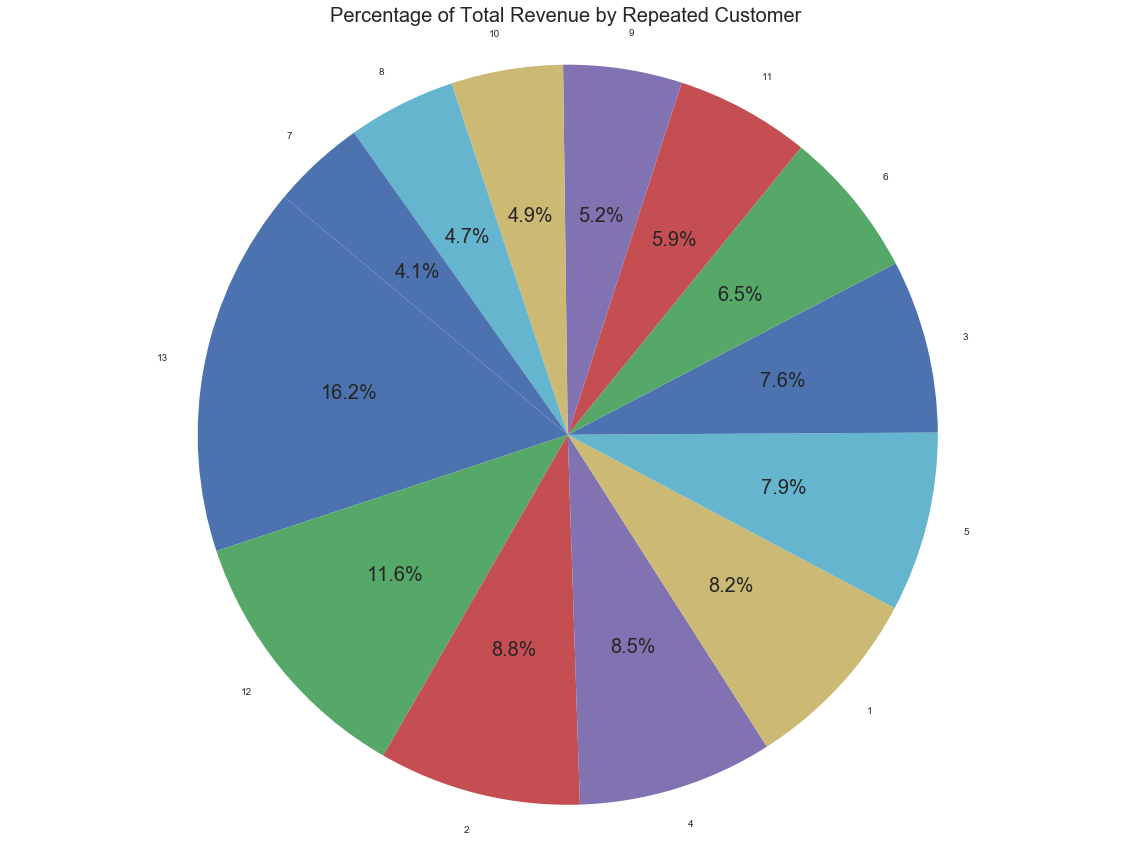

In [101]:
#we used pie chart to find the percentage fraction of the repeated customer
import matplotlib as mpl
plt.figure(figsize=(20,15))
plt.pie(df3m1.Revenue,labels=df3m1.Occurance,autopct='%1.1f%%', startangle=140)
mpl.rcParams['font.size'] = 25
plt.axis('equal')
plt.title('Percentage of Total Revenue by Repeated Customer',fontsize=20)
plt.show()
#We found out that more than 25% of the sale made by the customer that purchase monthly

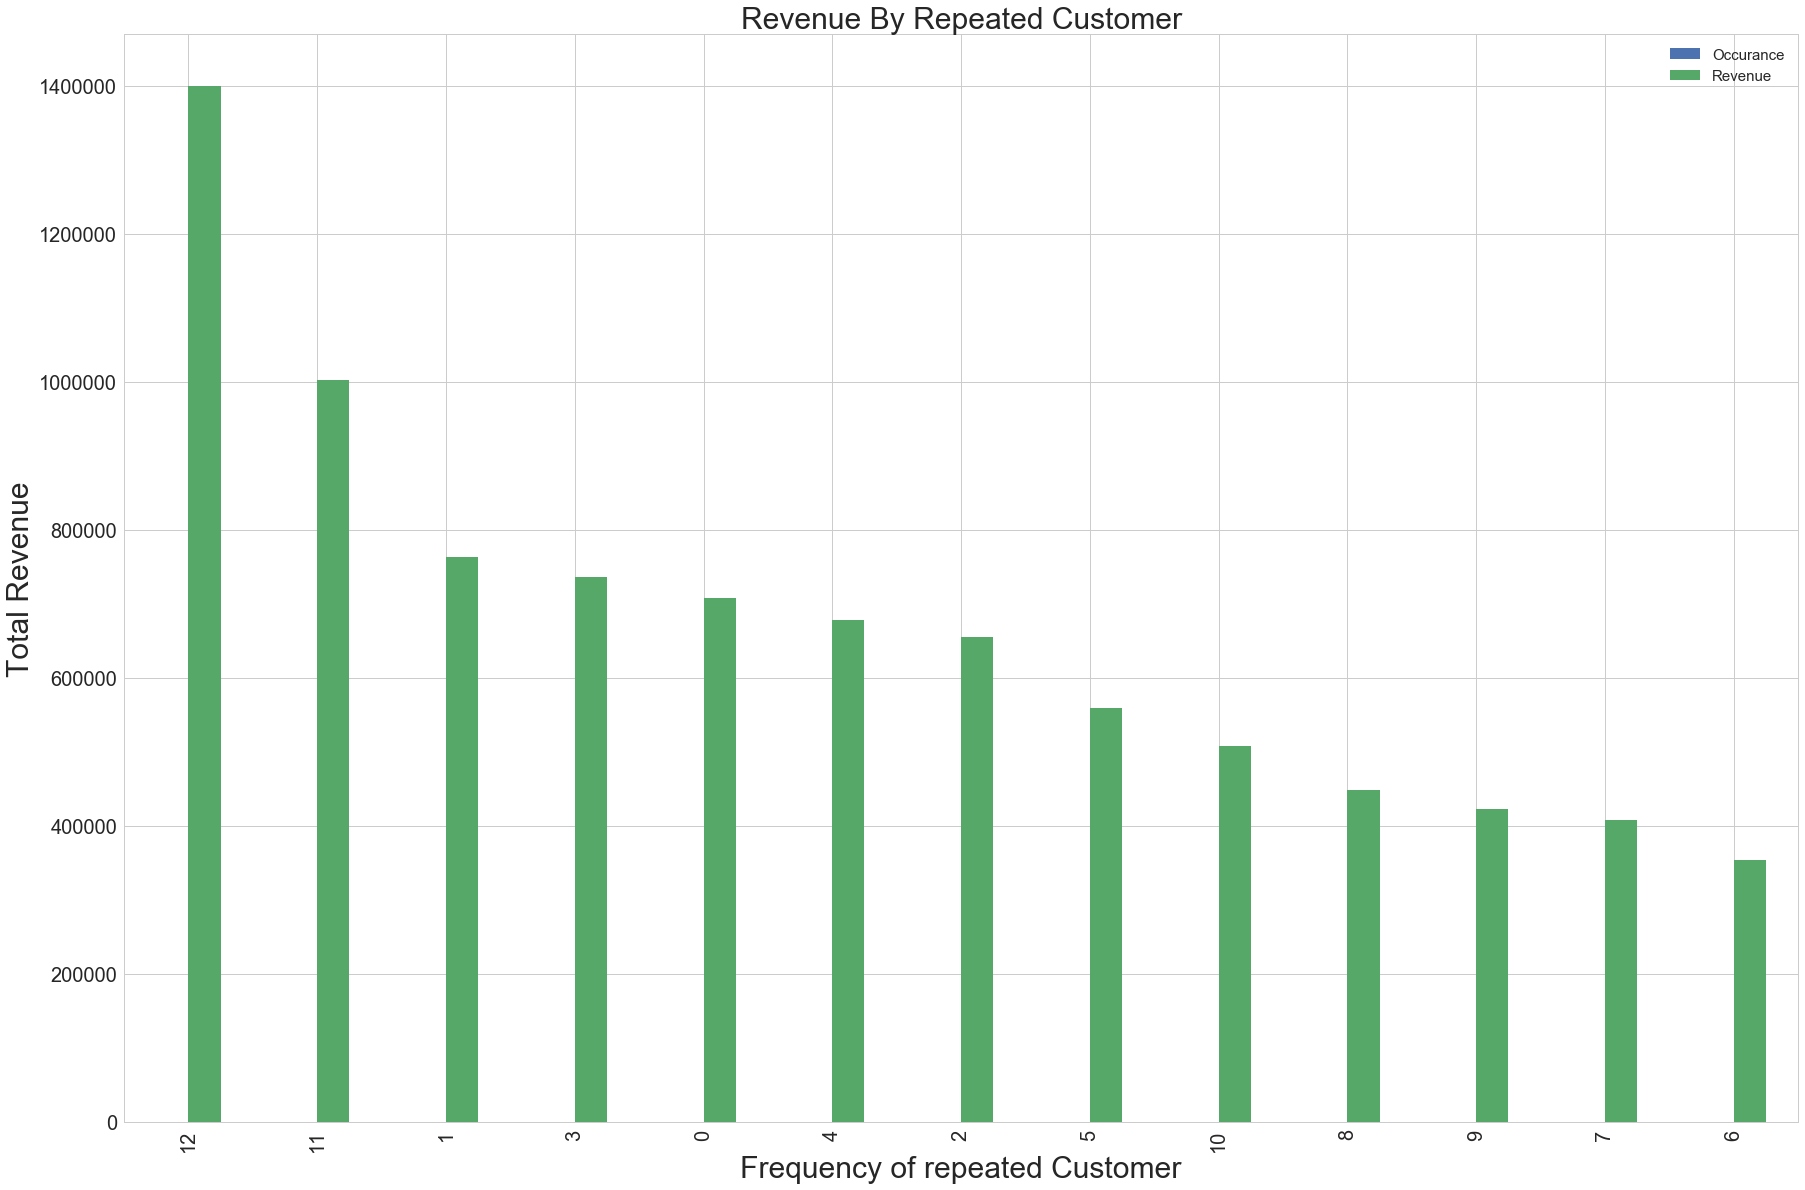

In [102]:
#We made bar plot for repeated customer purchase to have better on revenue generated by each occurance of customer
df3m1.plot(kind='bar', title ="Revenue by Repated Customer", figsize=(30, 20), legend=True, fontsize=20)
plt.title('Revenue By Repeated Customer',fontsize=30)
plt.ylabel('Total Revenue', fontsize=30)
plt.xlabel("Frequency of repeated Customer", fontsize=30)
plt.legend(loc=1, fontsize=15)
plt.show()

<h2>Explainatory Analysis</h2>
<br><h3>Time Series Analysys</h3>
<br> Annually-Our in total sale for the period of study was 10642110 Dollar
<br>Our Seasonal sales analysis showed that Autum contribute to the highest sale out of other season
<br> Our Monthly sales show that Sep 2011, October 2011, Nov 2011 made the highest sale
<br>Our weekly transaction pattern is tally with our monthly transaction
<br>Based on our days of month analysis, we found out that major transactions were made during early of month and at the middle of month. This in accordance to the bi-weeklu payday of western country
<br>The highest transaction for days of week is Thursday, lowest transaction on Sunday, and no transaction made on Saturday

<h3>Country Based Analysis</h3>
<br>U.K was the highest conrtibutor to sale, 85%
<br> The nest top 5 country are in approximity to UK are Netherland,EIRE,Germany and Frane (almost 10%)
<br> We found no emerging demand from another countries

<h3>Unit Price Based Analysis</h3>
<br>The lowest unit price items sold make up the majority of the trasactions
<br>0-2 Dollar (35.6% of total revenue), 2-4 Dollar(27.1% of total revenue),4-6 Dollar(17.5% of total revenue)

<h3>Customer ID Based analysis</h3>
<br>The repeating customer (buy every month) make up 27% percent of total purchase, which is 84 unique id out of 4338
<br> customer that buy lower than 5 times in the year made 42.6% of the total purchase
<br> We concluded that that majority of the revenue come from repating customer
<br>One time in a year buyer made the third largest transaction at 8.8%

<h3>Quantity Based analysis</h3>
<br>Most of the transaction consist of quantity between 10-100

<h3>Stock Code based Analysis</h3>
<br>there were 3812 unique stock code
<br>there were 2366 types of word that made up the whole description
<br>We try to find meaningful pattern based on highest selling stock code item, we concluded that we did not find any meaningful pattern
<br> We find it hard to categorize the data based on the description or stock code, we choose to categorize them based on unitprice instead
<br>The surge of sale during autum season was drived by christmast product

# DATA MODELLING

In [103]:
#import all libraries to be used in the data processing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from IPython.display import display, HTML
import datetime as dt
#import seaborn as sns #seaborn is already installed

In [104]:
df = pd.read_csv('FinalCleanData v2.csv',encoding="ISO-8859-1",dtype={'CustomerID': str,'InvoiceNo':str,})
df.InvoiceDateTime = pd.to_datetime(df.InvoiceDateTime, format="%Y/%m/%d %H:%M")
df.InvoiceDate = pd.to_datetime(df.InvoiceDate, format="%Y/%m/%d")
df.mth_end_dt = pd.to_datetime(df.mth_end_dt, format="%Y/%m/%d")
df['invoiceno_letter1']=df['InvoiceNo'].str[0:1]

df2 = pd.read_csv('Cancelled Transactions v2.csv',encoding="ISO-8859-1",dtype={'CustomerID': str,})
df2["CustomerID"].fillna("R"+df2["InvoiceNo"], inplace=True)
df2=df2.drop(['invoiceno_letter1','length_invoiceno','length_stockcode'],axis=1)
df2.InvoiceDateTime = pd.to_datetime(df2.InvoiceDateTime, format="%Y/%m/%d %H:%M")
df2.InvoiceDate = pd.to_datetime(df2.InvoiceDate, format="%Y/%m/%d")
df2.mth_end_dt = pd.to_datetime(df2.mth_end_dt, format="%Y/%m/%d")
df2.loc[df2['InvoiceDate']<dt.date(2010,12,21),'Season']='Autumn'
df2.loc[((df2["InvoiceDate"]>=dt.date(2010,12,21)) & (df2["InvoiceDate"]<dt.date(2011,3,20))),'Season']="Winter" 
df2.loc[((df2["InvoiceDate"]>=dt.date(2011,3,20)) & (df2["InvoiceDate"]<dt.date(2011,6,21))),'Season']="Spring" 
df2.loc[((df2["InvoiceDate"]>=dt.date(2011,6,21)) & (df2["InvoiceDate"]<dt.date(2011,9,23))),'Season']="Summer" 
df2.loc[((df2["InvoiceDate"]>=dt.date(2011,9,23)) & (df2["InvoiceDate"]<dt.date(2011,12,22))),'Season']="Autumn" 
df2.loc[df2["InvoiceDate"]>=dt.date(2011,12,22),'Season']="Winter" 
df2["Revenue"]=df2["Quantity"]*df2["UnitPrice"]
df2['invoiceno_letter1']=df2['InvoiceNo'].str[0:1]

df3=pd.concat([df,df2])
df3.isnull().sum()

FileNotFoundError: File b'FinalCleanData v2.csv' does not exist

In [123]:
#remove random CustomerID because some different invoiceno may refer to the same customer.

print(df3.shape)
df1=df3[df3['CustomerID'].str[0:1]!='R']
print(df1.shape)

(531269, 13)
(399689, 13)


## Response Variable Derivation
If there is more than 1 invoiceno associated with a CustomerID, then customer is a Repeated Customer.
<br> Otherwise the customer is a One-Off Customer.

In [124]:
#response variable derivation

target = df1.drop_duplicates(subset=('CustomerID','InvoiceNo'),keep='first').CustomerID.value_counts().to_frame().reset_index()
target.columns=['CustomerID','freq']
target=target.drop_duplicates()
target.loc[target['freq']>1,'target']=1
target.loc[target['freq']==1,'target']=0
print(target.target.value_counts())
target.shape

1.0    3035
0.0    1328
Name: target, dtype: int64


(4363, 3)

## Independent factors derivation

In [125]:
#no of transaction performed (by seasons)

tmp=df1.drop_duplicates(subset=['CustomerID','InvoiceNo'],keep='first')
tmp2=pd.crosstab(tmp["CustomerID"],tmp["Season"],margins=True).reset_index()
tmp2.rename(columns={'Autumn':'no_txn_autumn','Spring':'no_txn_spring','Summer':'no_txn_summer'\
                     ,'Winter':'no_txn_winter','All':'total_no_txn'},inplace=True)
target=pd.merge(target,tmp2,on='CustomerID',how='left').drop('total_no_txn',axis=1)
print(target.shape)
target.head(5)

(4363, 7)


,CustomerID,freq,target,no_txn_autumn,no_txn_spring,no_txn_summer,no_txn_winter
0,14911,242,1.0,110,44,66,22
1,12748,217,1.0,108,45,44,20
2,17841,169,1.0,59,34,46,30
3,14606,125,1.0,34,28,30,33
4,15311,118,1.0,41,23,26,28


In [126]:
#min, max and mean number of transactions among the seasons

target["max_txn_season"] = target[["no_txn_autumn", "no_txn_spring",'no_txn_summer','no_txn_winter']].max(axis=1) #max value from all columns selected
target['min_txn_season'] = target[["no_txn_autumn", "no_txn_spring",'no_txn_summer','no_txn_winter']].min(axis=1)
target['avg_txn_season'] = target[["no_txn_autumn", "no_txn_spring",'no_txn_summer','no_txn_winter']].mean(axis=1)
print(target.shape)
target.head(5)

(4363, 10)


,CustomerID,freq,target,no_txn_autumn,no_txn_spring,no_txn_summer,no_txn_winter,max_txn_season,min_txn_season,avg_txn_season
0,14911,242,1.0,110,44,66,22,110,22,60.50
1,12748,217,1.0,108,45,44,20,108,20,54.25
2,17841,169,1.0,59,34,46,30,59,30,42.25
3,14606,125,1.0,34,28,30,33,34,28,31.25
4,15311,118,1.0,41,23,26,28,41,23,29.50


In [127]:
#develop a factor based on product cancelled or not

tmp3=df1[['CustomerID','invoiceno_letter1','InvoiceNo']].drop_duplicates()
tmp3.loc[tmp3['invoiceno_letter1']=='C','purchases_cancelled']='Y'
tmp3.loc[tmp3['invoiceno_letter1']!='C','purchases_cancelled']='N'
#tmp3.purchases_returned.value_counts()
#pd.crosstab(tmp3['CustomerID'],tmp3['purchases_cancelled'],margins=True).reset_index()
tmp=pd.crosstab(tmp3['CustomerID'],tmp3['purchases_cancelled'],margins=True).reset_index()
tmp.rename(columns={'N':'no_times_proceed','Y':'no_times_cancelled'},inplace=True)
target=pd.merge(target,tmp,on='CustomerID',how='left').drop('All',axis=1)
print(target.shape)
target.head(3)

(4363, 12)


,CustomerID,freq,target,no_txn_autumn,no_txn_spring,no_txn_summer,no_txn_winter,max_txn_season,min_txn_season,avg_txn_season,no_times_proceed,no_times_cancelled
0,14911,242,1.0,110,44,66,22,110,22,60.50,198,44
1,12748,217,1.0,108,45,44,20,108,20,54.25,206,11
2,17841,169,1.0,59,34,46,30,59,30,42.25,124,45


In [128]:
#factors based number of items bought
tmp=df1[df1['invoiceno_letter1']!='C']
tmp2=tmp[['CustomerID','InvoiceNo','StockCode']].drop_duplicates()
tmp3=tmp2[['CustomerID','InvoiceNo']].drop_duplicates()
tmp4=tmp2.drop('CustomerID',axis=1).groupby('InvoiceNo').count().reset_index().rename(columns={'StockCode':'n_items_bought'})
tmp5=pd.merge(tmp3,tmp4,on='InvoiceNo',how='left').groupby(by=['CustomerID'])['n_items_bought'].agg(['min','max']).\
reset_index().rename(columns={'min':'min_n_items_bought','max':'max_n_items_bought'})
target=pd.merge(target,tmp5,on='CustomerID',how='left')
target['min_n_items_bought'].fillna(0,inplace=True)
target['max_n_items_bought'].fillna(0,inplace=True)
print(target.shape)
target.head(5)

(4363, 14)


,CustomerID,freq,target,no_txn_autumn,no_txn_spring,no_txn_summer,no_txn_winter,max_txn_season,min_txn_season,avg_txn_season,no_times_proceed,no_times_cancelled,min_n_items_bought,max_n_items_bought
0,14911,242,1.0,110,44,66,22,110,22,60.50,198,44,1.0,120.0
1,12748,217,1.0,108,45,44,20,108,20,54.25,206,11,1.0,139.0
2,17841,169,1.0,59,34,46,30,59,30,42.25,124,45,1.0,183.0
3,14606,125,1.0,34,28,30,33,34,28,31.25,90,35,2.0,64.0
4,15311,118,1.0,41,23,26,28,41,23,29.50,91,27,3.0,86.0


In [129]:
#factors based on total number of different items purchased

tmp=df1[df1['invoiceno_letter1']!='C']
tmp2=tmp[['CustomerID','StockCode']].drop_duplicates()
tmp4=tmp2.groupby('CustomerID').count().reset_index().rename(columns={'StockCode':'total_items_bought'})
target=pd.merge(target,tmp4,on='CustomerID',how='left')
target['total_items_bought'].fillna(0,inplace=True)
print(target.shape)
target.head(5)

(4363, 15)


,CustomerID,freq,target,no_txn_autumn,no_txn_spring,no_txn_summer,no_txn_winter,max_txn_season,min_txn_season,avg_txn_season,no_times_proceed,no_times_cancelled,min_n_items_bought,max_n_items_bought,total_items_bought
0,14911,242,1.0,110,44,66,22,110,22,60.50,198,44,1.0,120.0,1785.0
1,12748,217,1.0,108,45,44,20,108,20,54.25,206,11,1.0,139.0,1766.0
2,17841,169,1.0,59,34,46,30,59,30,42.25,124,45,1.0,183.0,1322.0
3,14606,125,1.0,34,28,30,33,34,28,31.25,90,35,2.0,64.0,816.0
4,15311,118,1.0,41,23,26,28,41,23,29.50,91,27,3.0,86.0,567.0


In [130]:
#max, min and total dollar amount spent per transaction by each customer

tmp=df1[df1['invoiceno_letter1']!='C']
tmp2=tmp[['CustomerID','InvoiceNo','Revenue','StockCode']].drop_duplicates()
tmp=tmp2.groupby(by=['CustomerID','InvoiceNo'])['Revenue'].sum().reset_index(name='Revenue').\
groupby('CustomerID')['Revenue'].agg(['sum','min','max','mean']).reset_index()
tmp=tmp.rename(columns={'min':'min_sterling_spent_custin','max':'max_sterling_spent_custin',\
                        'mean':'mean_sterling_spent_custin','sum':'Total_sterling_spent_cust'})
#print(tmp.shape)
target=pd.merge(target,tmp,on='CustomerID',how='left')
target['min_sterling_spent_custin'].fillna(0,inplace=True)
target['max_sterling_spent_custin'].fillna(0,inplace=True)
target['mean_sterling_spent_custin'].fillna(0,inplace=True)
target['Total_sterling_spent_cust'].fillna(0,inplace=True)
print(target.shape)
target.head(3)

(4363, 19)


,CustomerID,freq,target,no_txn_autumn,no_txn_spring,no_txn_summer,no_txn_winter,max_txn_season,min_txn_season,avg_txn_season,no_times_proceed,no_times_cancelled,min_n_items_bought,max_n_items_bought,total_items_bought,Total_sterling_spent_cust,min_sterling_spent_custin,max_sterling_spent_custin,mean_sterling_spent_custin
0,14911,242,1.0,110,44,66,22,110,22,60.50,198,44,1.0,120.0,1785.0,136161.83,1.45,4345.10,687.686010
1,12748,217,1.0,108,45,44,20,108,20,54.25,206,11,1.0,139.0,1766.0,31650.78,0.95,1948.35,153.644563
2,17841,169,1.0,59,34,46,30,59,30,42.25,124,45,1.0,183.0,1322.0,40495.99,1.45,969.01,326.580565


In [131]:
#Keep the file in csv format
target.to_csv('modelling dataset.csv',index=False)
#target = pd.read_csv('modelling dataset.csv',dtype={'CustomerID': str,})
target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4363 entries, 0 to 4362
Data columns (total 19 columns):
CustomerID                    4363 non-null object
freq                          4363 non-null int64
target                        4363 non-null float64
no_txn_autumn                 4363 non-null int64
no_txn_spring                 4363 non-null int64
no_txn_summer                 4363 non-null int64
no_txn_winter                 4363 non-null int64
max_txn_season                4363 non-null int64
min_txn_season                4363 non-null int64
avg_txn_season                4363 non-null float64
no_times_proceed              4363 non-null int64
no_times_cancelled            4363 non-null int64
min_n_items_bought            4363 non-null float64
max_n_items_bought            4363 non-null float64
total_items_bought            4363 non-null float64
Total_sterling_spent_cust     4363 non-null float64
min_sterling_spent_custin     4363 non-null float64
max_sterling_spent_custin   

<h2>Modelling & Evaluation</h2>

In [133]:
#libraries

import pandas as pd
import numpy as np

#for scatterplot matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [134]:
#load the dataset
model_set=pd.read_csv('modelling dataset.csv',dtype={'CustomerID': str,})
model_set=model_set.drop('freq',axis=1)
model_set.target.value_counts()

1.0    3035
0.0    1328
Name: target, dtype: int64

## Variable Selection

### Univariate Analysis 
First stage to shortlist factors.

In [137]:
model_set.describe(percentiles=[0.05,0.25,0.5,0.75,0.95])

,target,no_txn_autumn,no_txn_spring,no_txn_summer,no_txn_winter,max_txn_season,min_txn_season,avg_txn_season,no_times_proceed,no_times_cancelled,min_n_items_bought,max_n_items_bought,total_items_bought,Total_sterling_spent_cust,min_sterling_spent_custin,max_sterling_spent_custin,mean_sterling_spent_custin
count,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000
mean,0.695622,1.921843,1.148522,1.148063,0.775384,2.691038,0.343342,1.248453,4.218428,0.775384,14.325464,30.667431,61.019024,2002.445998,262.316333,642.082416,412.690263
std,0.460196,3.659084,2.354513,2.474925,1.772599,3.681170,1.393941,2.270996,7.619337,1.964604,17.121460,29.303861,85.171273,8874.986594,1219.570478,3078.232799,1795.183881
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.250000,1.000000,0.000000,1.000000,3.000000,3.000000,106.868000,13.255000,98.423000,84.710500
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.250000,1.000000,0.000000,3.000000,12.000000,15.000000,300.840000,92.430000,215.740000,175.077917
50%,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.750000,2.000000,0.000000,9.000000,23.000000,35.000000,656.680000,166.080000,361.040000,287.220000
75%,1.000000,2.000000,1.000000,1.000000,1.000000,3.000000,0.000000,1.250000,5.000000,1.000000,19.000000,40.000000,77.000000,1621.805000,307.165000,606.905000,422.412059
95%,1.000000,7.000000,5.000000,5.000000,3.000000,7.000000,2.000000,4.000000,13.000000,4.000000,46.000000,84.000000,203.700000,5724.905000,641.832000,1505.010000,912.927750
max,1.000000,110.000000,45.000000,66.000000,33.000000,110.000000,30.000000,60.500000,206.000000,45.000000,259.000000,540.000000,1785.000000,279138.020000,77183.600000,168469.600000,84236.250000



Drop 5 factors - no_txn_spring, no_txn_summer, no_txn_winter, min_txn_season, no_times_cancelled due to more than 50% of data in one category due to data concentration at value 0. 

In [138]:
#dropping variables
model_set2=model_set.copy()
model_set2=model_set2.drop(['no_txn_spring','no_txn_summer','no_txn_winter','min_txn_season','no_times_cancelled'],axis=1)
print('Initial number of columns:',model_set.shape[1])
print('After reduction:',model_set2.shape[1])

Initial number of columns: 18
After reduction: 13


### Multivariate Analysis

Univariate and multivariate plots against target variable:

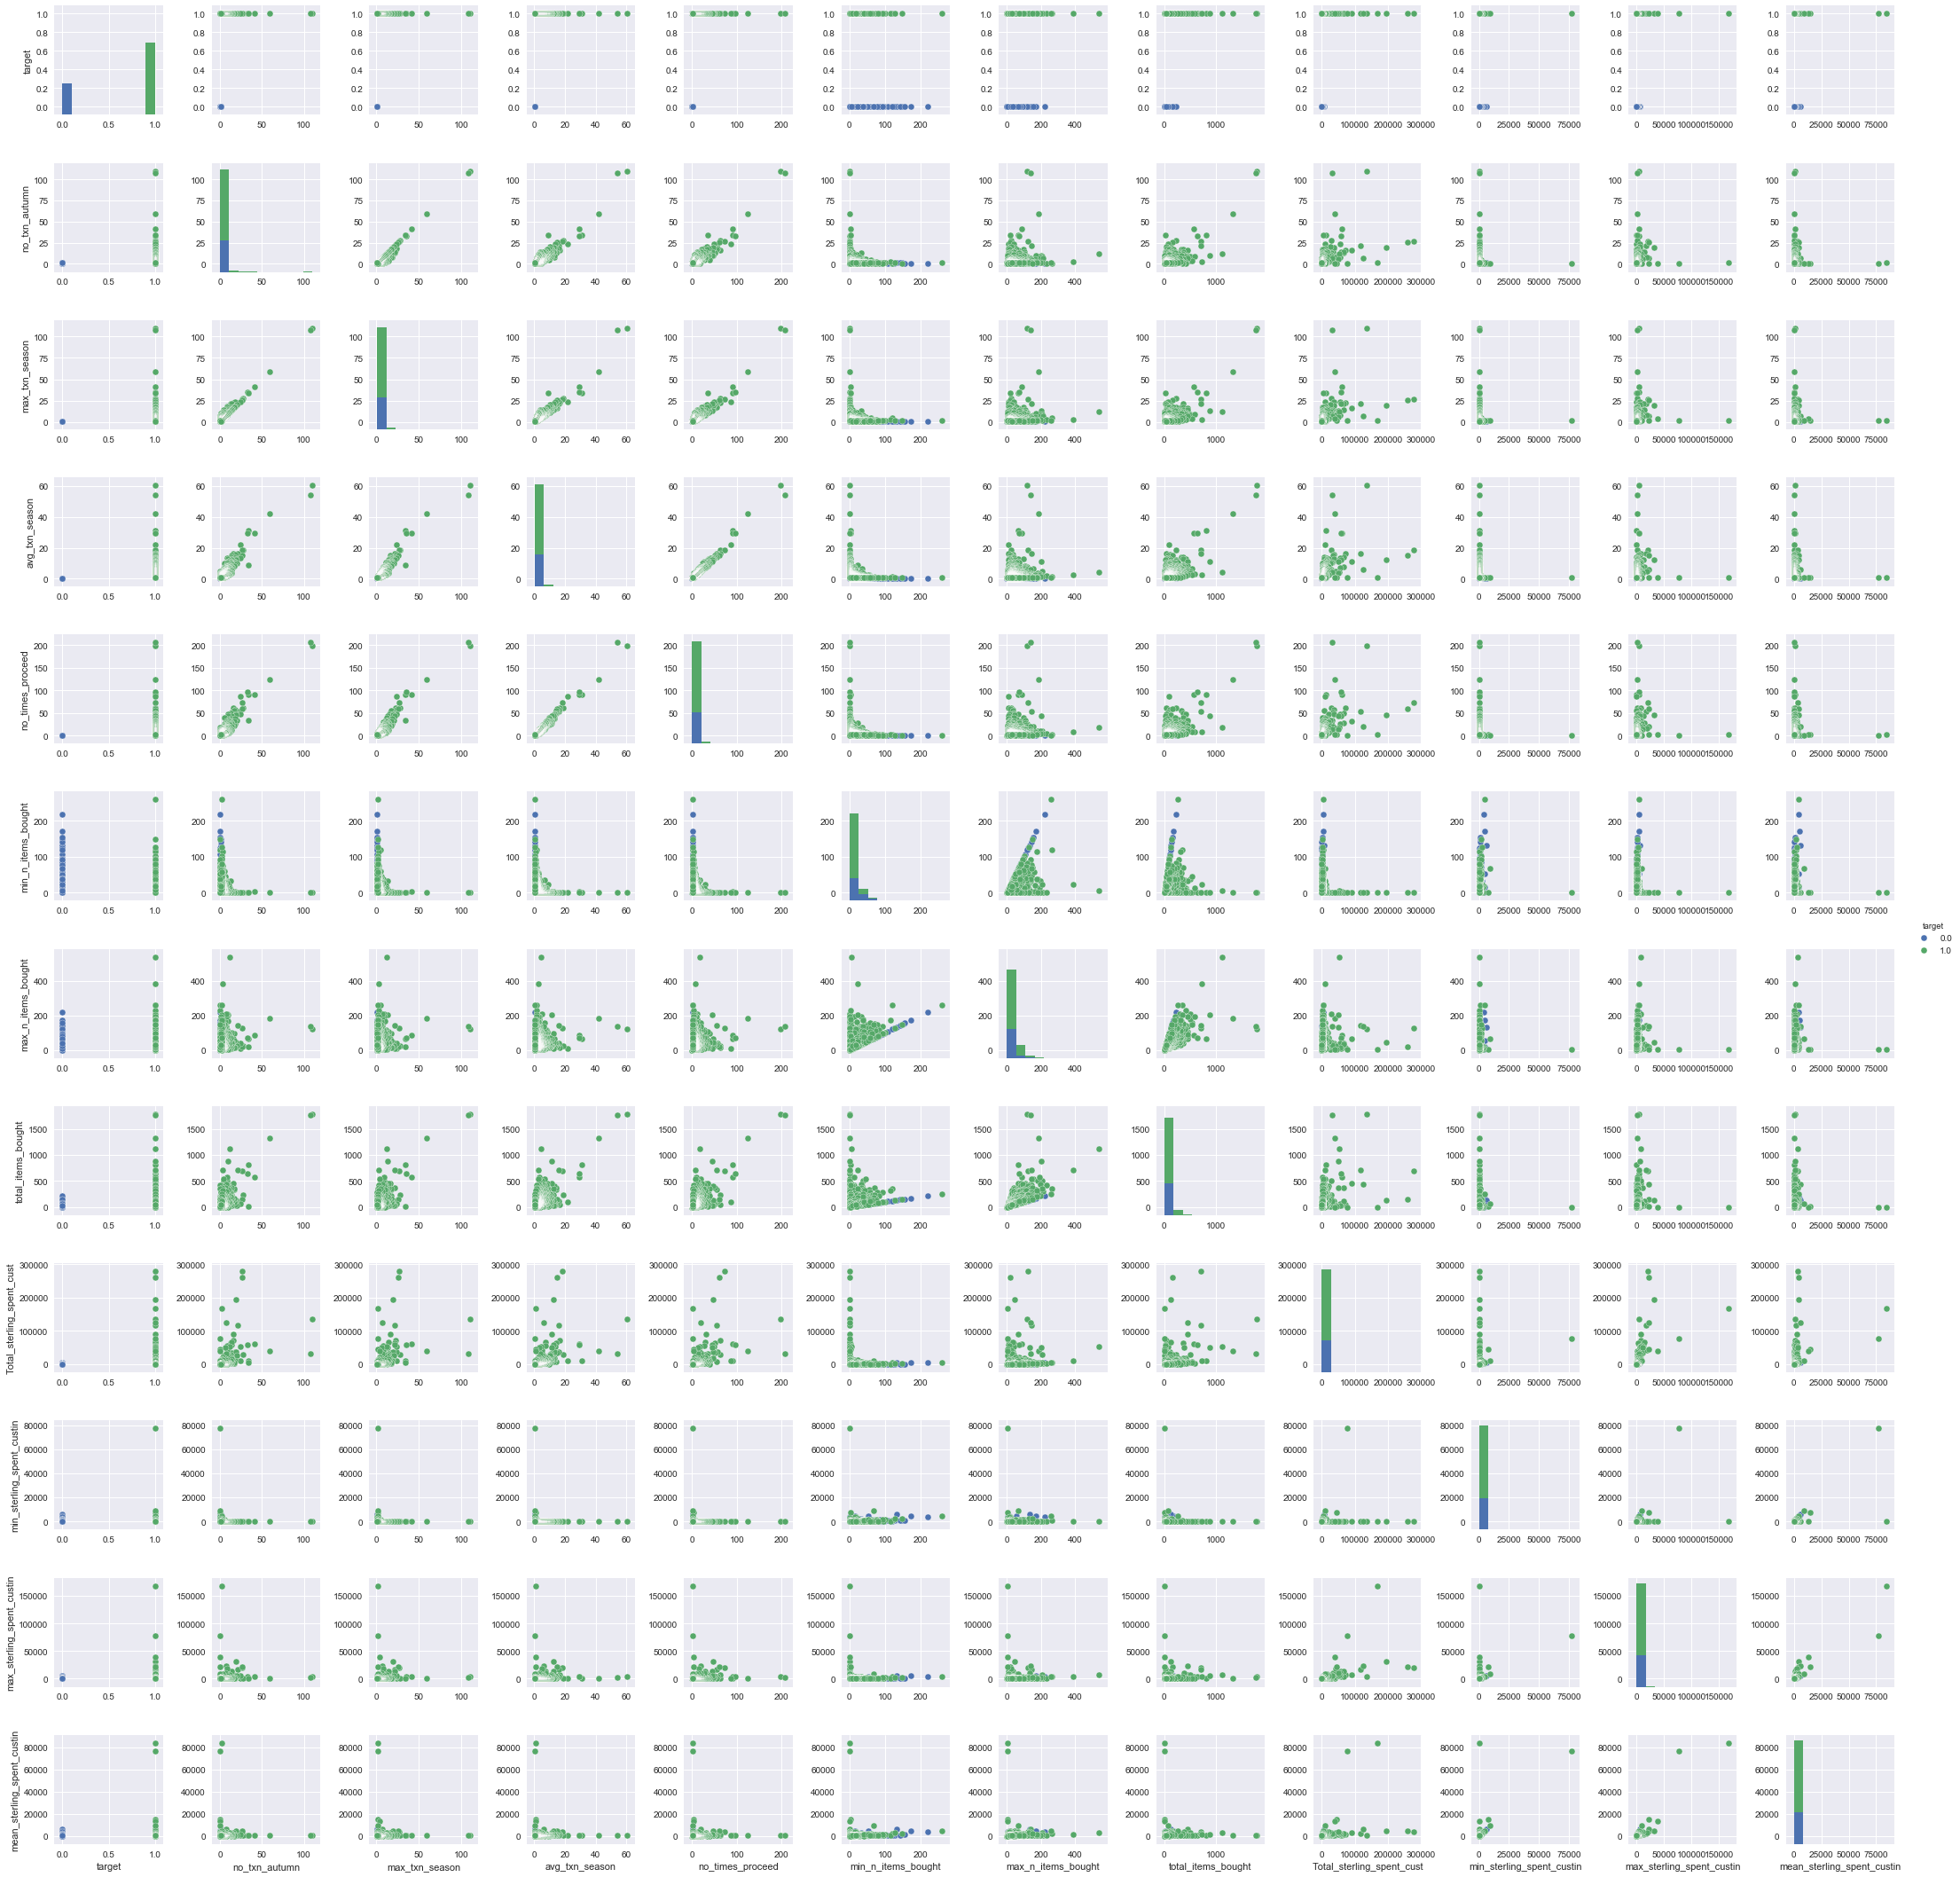

In [141]:
#Scatterplot matrix to show correlation - not really a good idea until factors are shortlisted some more.
sns.pairplot(model_set2.drop('CustomerID',axis=1), hue='target')
plt.show()

Based on the scatterplot matrix above, we would shortlist the following factors to be tested in our model:
<br>1.min_n_items_bought
<br>2.max_n_items_bought
<br>3.total_items_bought
<br><br>Visualising the correlation of each columns using heatmap to see which variables are highly correlated to each other and thus will be redundant if both are included in the model fitting process:

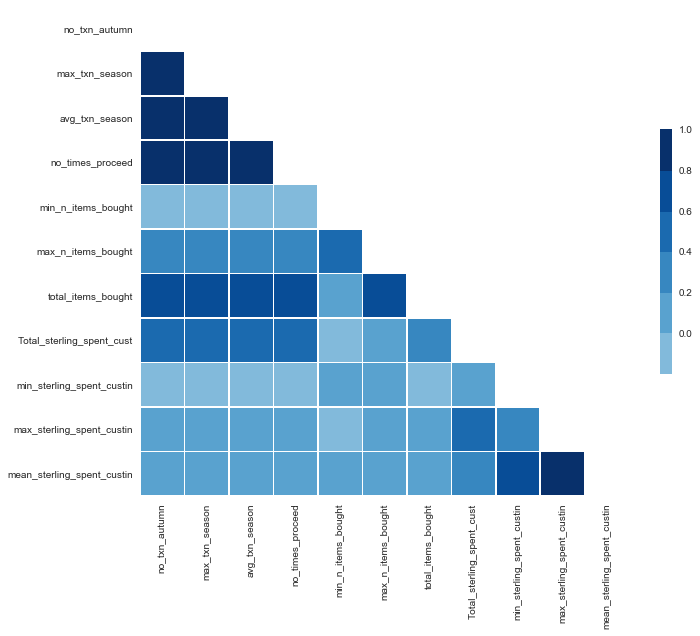

In [142]:
#Source:https://seaborn.pydata.org/examples/many_pairwise_correlations.html
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(model_set2.drop(['target','CustomerID'],axis=1).corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(220, 10, as_cmap=True)
cmap = plt.cm.get_cmap("Blues", 10)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(model_set2.drop(['target','CustomerID'],axis=1).corr(), mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

The highly correlated variables have a darker shade in the heatmap. It looks like total_items_bought and max_n_items_bought have high correlation, and we varify this by looking at the correlation matrix itself:

In [143]:
model_set2[['min_n_items_bought','max_n_items_bought','total_items_bought']].corr()

,min_n_items_bought,max_n_items_bought,total_items_bought
min_n_items_bought,1.000000,0.468484,0.105687
max_n_items_bought,0.468484,1.000000,0.747832
total_items_bought,0.105687,0.747832,1.000000


Since total_items_bought and max_n_items_bought are highly correlated, we will choose max_n_items_bought since the range of numbers is a lot closer to the range of numbers of min_n_items_bought as compared to total_items_bought.

## Sample Splitting

In [145]:
#transform data into NumPy array
X=model_set2[['min_n_items_bought','max_n_items_bought']]
print('Dimension of independent variable:',X.shape)
y = model_set2['target']
print('\nDimension of dependent variable',y.shape)

Dimension of independent variable: (4363, 2)

Dimension of dependent variable (4363,)


In [146]:
#70%-30% dataset train-test data split such that both train and test set contain equal ratio of repeated and one-off customers.
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y=train_test_split(X, y, train_size=0.7,stratify=y,random_state=32437)

print('Dimension of independent variable train set (70%):',train_x.shape)
print('Dimension of response variable train set (70%):',train_y.shape)
print('\nDimension of independent variable test set (30%):',test_x.shape)
print('Dimension of response variable test set (30%):',test_y.shape)
print('\nSplit of response in train set:\n',train_y.value_counts())
print('\nSplit of response in test set:\n',test_y.value_counts())

Dimension of independent variable train set (70%): (3054, 2)
Dimension of response variable train set (70%): (3054,)

Dimension of independent variable test set (30%): (1309, 2)
Dimension of response variable test set (30%): (1309,)

Split of response in train set:
 1.0    2124
0.0     930
Name: target, dtype: int64

Split of response in test set:
 1.0    911
0.0    398
Name: target, dtype: int64


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


## Model fitting using Logistic Regression

In [147]:
#model fitting to train dataset
from sklearn import linear_model
model_logit=linear_model.LogisticRegression(random_state=39865)
model_logit.fit(train_x,train_y)
print('Logistic regression independent variable coefficient:\n',model_logit.coef_)
print('\nLogistic regression intercept:\n',model_logit.intercept_)

Logistic regression independent variable coefficient:
 [[-3.6992718   3.69463379]]

Logistic regression intercept:
 [-1.43379593]


The first and second independent variable coefficient corresponds to min_n_items_bought (minimum number of items purchased in an invoice by the customer) and max_n_items_bought(maximum number of items purchased in an invoice by the customer) respectively.
<br><br>The sign of the independent variable coefficient is also in line with how we would expect the variable to interact with the response variable:
<br>1. We expect lower minimum number of items purchased by the customer to reflect lesser tendency of the customer being a repeated customer.
<br>2. Similarly, we would expect customers who purchase more items to become the retailer's repeated customer.

### Model Evaluation

In [148]:
from sklearn import metrics
print('Accuracy of train set:',metrics.accuracy_score(model_logit.predict(train_x),train_y)*100)
print('Accuracy of test set:',metrics.accuracy_score(model_logit.predict(test_x),test_y)*100)

Accuracy of train set: 93.7459070072
Accuracy of test set: 93.2009167303


### Cross validation

In [149]:
from sklearn.model_selection import cross_val_score
print('Accuracy across each cross validation sample:\n',cross_val_score(model_logit, X, y, cv=5, n_jobs=-1)*100)
print('\nMean cross validation accuracy:',np.mean(cross_val_score(model_logit, X, y, cv=5, n_jobs=-1))*100)

Accuracy across each cross validation sample:
 [ 99.88545246  99.54180985  98.05269187  90.13761468  80.27522936]

Mean cross validation accuracy: 93.5785596435


### Other Validation measures

#### 1. Confusion matrix: Precision and Recall

In [150]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, model_logit.predict(test_x), labels=[1.0,0.0])

array([[822,  89],
       [  0, 398]], dtype=int64)

In [151]:
#Getting True Positive(TP), False Positive(FP), True Negative(TN) and False Negative(FN) 
#to calculate Accuracy, Precision/Specificity and Recall/Sensitivity.
tp, fn, fp, tn = confusion_matrix(test_y, model_logit.predict(test_x), labels=[1.0,0.0]).ravel()

#print('Accuracy = ',(tp+tn)/(tp+tn+fp+fn)) #given by accuracy_score on train set
print('Precision = ', tp/(tp+fp))
print('Recall = ', tp/(tp+fn))

Precision =  1.0
Recall =  0.902305159166


Based on the metrics calculated, the model built missed around 10% of repeated customers and classified them as one-off customers.
<br>Since only 1 year of data is available for model building, the precision may be overstated in this case.